# Search: Solving a Maze Using a Goal-based Agent


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.


## Introduction

The agent has a map of the maze it is in (i.e., the environment is deterministic, discrete, and known). The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  

This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent can just follow the path and does not need percepts. The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree and the goal is to traverse all nodes. We are interested in dynamically creating a search tree with the aim of finding a good/the best path to the goal state. Follow the pseudo code presented in the text book closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Here is the small example maze:

In [1]:
f = open("small_maze.txt", "r")
maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG          XX       X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore search may not form proper trees unless cycles are prevented. You need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the file [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. I represent a position as a 2-tuple of the form `(row, col)`. 

In [2]:
%run maze_helper.py

maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)`
print("Position(8,1):", look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


Visualize the maze

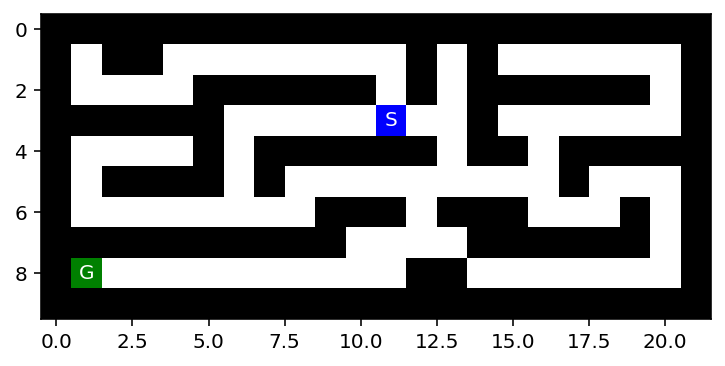

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", find_pos(maze, what = "S"))
print("Goal location:", find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [5]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class.


__Tree and memory management example:__ Create the root node and append the node for going east with a cost of 1.

In [6]:
import sys

print("Create root node")
root = Node(pos = (0,0), parent = None, action = None, cost = 0)
print("root:", root)
print("root (reference):", repr(root))

print()
print("Go east with cost 1 (from the parent root)")
node2 = Node(pos = (0,1), parent = root, action = "E", cost = 1)
print("node2:", node2)
print("parent of node2: ", node2.parent)
print("parent of node2 (reference): ", repr(node2.parent))
# Note: -1 is used because passing root to getrefcount adds one reference
print("Root is now referenced twice. Reference count for garbage collection (root node):", sys.getrefcount(root)-1)

print()
print("Note that the root node is safe from garbage collection as long as we have also a reference in node2") 
root = None
print(root)
print("parent of node2 (reference to root node): ", repr(node2.parent))
print("Reference count for garbage collection (root node):", sys.getrefcount(node2.parent)-1)

print()
print("Path from root to node2")
path = node2.get_path_from_root()
print("References:", path)
print("Positions:", [n.pos for n in path])
print("Actions:", [n.action for n in path])
print("Cost:", [n.cost for n in path])


print()
print("Once we delete the reference to node2, the reference count for all nodes goes to zero and the whole tree is exposed to garbage collection.")
node2 = None



Create root node
root: Node - pos = (0, 0); action = None; cost = 0
root (reference): <__main__.Node object at 0x7fbbe6166fd0>

Go east with cost 1 (from the parent root)
node2: Node - pos = (0, 1); action = E; cost = 1
parent of node2:  Node - pos = (0, 0); action = None; cost = 0
parent of node2 (reference):  <__main__.Node object at 0x7fbbe6166fd0>
Root is now referenced twice. Reference count for garbage collection (root node): 2

Note that the root node is safe from garbage collection as long as we have also a reference in node2
None
parent of node2 (reference to root node):  <__main__.Node object at 0x7fbbe6166fd0>
Reference count for garbage collection (root node): 1

Path from root to node2
References: [<__main__.Node object at 0x7fbbe6166fd0>, <__main__.Node object at 0x7fbbe6177190>]
Positions: [(0, 0), (0, 1)]
Actions: [None, 'E']
Cost: [0, 1]

Once we delete the reference to node2, the reference count for all nodes goes to zero and the whole tree is exposed to garbage colle

# Goal
Implement the following search algorithms for solving different mazes:

* Breadth-first search (BFS)
* Depth-first search (DFS)
* Greedy best-first search (GBFS)
* A* search

Run each of the above algorithms on the 
[small maze](small_maze.txt), 
[medium maze](medium_maze.txt), 
[large maze](large_maze.txt), 
[open maze](open_maze.txt),
[wall maze](wall_maze.txt),
[loops maze](loops_maze.txt),
[empty maze](empty_maze.txt), and
[empty 2_maze](empty_2_maze.txt).
For each problem instance and each search algorithm, report the following in a table:

* The solution and its path cost
* Number of nodes expanded
* Maximum tree depth
* Maximum size of the frontier

Display each solution by marking every maze square (or state) visited and the squares on the final path.

## Task 1: Defining the search Problem [1 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

__Answer:__
* Initial state: a maze with a start point and a goal point
* Actions: north, south, west and east
* Transition model: return a path from the root to current node
* Goal state: find a path from start point to goal point
* Path cost: number of steps

## Task 2: Breadth-first and Depth-first [4 points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information during search in the tree, and the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint, you need to implement DFS in a different way without a `reached` data structure and by releasing nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
%run maze_helper.py
import queue

def bfs(maze):
    # Find the start point and goal point
    start_node = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    goal_node = Node(pos = find_pos(maze, what = "G"), parent = None, action = None, cost = 0)
    
    # If start point is goal point, finish
    current_node = start_node
    if current_node.pos == goal_node.pos: return current_node
    
    frontier_nodes = queue.Queue()
    frontier_nodes.put(current_node)
    
    reached_nodes = list()
    reached_nodes.append(current_node.pos)
    
    # Attributes used to record performance
    count_node_expanded = 1
    max_tree_depth = 1
    max_frontier_size = 1
    
    while frontier_nodes.empty() != True:
        current_node = frontier_nodes.get()
        expand_list = expand(maze, current_node)
        
        for node in expand_list:
            if node.pos == goal_node.pos: 
                path = node.get_path_from_root()
                if len(path) > max_tree_depth: 
                    max_tree_depth = len(path)
                print("BFS:")
                print("Path Cost:", path[len(path) - 1].cost)
                print("Nodes Expanded:", count_node_expanded)
                print("Max Tree Depth:", max_tree_depth)
                print("Max Tree Size:", len(reached_nodes))
                print("Max Frontier Size:", max_frontier_size)
                
                # Mark the explored squares and solution path in the maze
                for n in reached_nodes:
                    if maze[n[0]][n[1]] != 'G' and maze[n[0]][n[1]] != 'S': 
                        maze[n[0]][n[1]] = '.'
                for n in node.get_path_from_root():
                    if maze[n.pos[0]][n.pos[1]] != 'G' and maze[n.pos[0]][n.pos[1]] != 'S': 
                        maze[n.pos[0]][n.pos[1]] = 'P'
                show_maze(maze)
                
                return node
            
            if node.pos not in reached_nodes:
                frontier_nodes.put(node)
                reached_nodes.append(node.pos)
                
                count_node_expanded += 1
                if len(node.get_path_from_root()) > max_tree_depth: 
                    max_tree_depth = len(node.get_path_from_root())
                if frontier_nodes.qsize() > max_frontier_size: 
                    max_frontier_size = frontier_nodes.qsize()
                
    return 0

def dfs(maze):
    # Find the start point and goal point
    start_node = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    goal_node = Node(pos = find_pos(maze, what = "G"), parent = None, action = None, cost = 0)
    
    # If start point is goal point, finish
    current_node = start_node
    path = current_node.get_path_from_root()
    if current_node.pos == goal_node.pos: return current_node
    
    frontier_nodes = queue.LifoQueue()
    frontier_nodes.put(current_node)
    
    # Attributes used to record performance
    count_node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1
    
    while frontier_nodes.empty() != True:
        
        current_node = frontier_nodes.get()
        if maze[current_node.pos[0]][current_node.pos[1]] != 'G' and \
           maze[current_node.pos[0]][current_node.pos[1]] != 'S': 
            maze[current_node.pos[0]][current_node.pos[1]] = '.'

        # If the node popped from frontier is on the current path
        # it will cause a cycle. So pop the next node in the queue.
        if current_node.pos in [n.pos for n in path] and current_node != start_node:
            continue
        else:
            path = current_node.get_path_from_root()
        
        if current_node.pos == goal_node.pos: 
            path = node.get_path_from_root()
            if len(path) > max_tree_depth: 
                max_tree_depth = len(path)
            if len(path) > max_tree_size: 
                max_tree_size = len(path)
            print("DFS:")
            print("Path Cost:", path[len(path) - 1].cost)
            print("Nodes Expanded:", count_node_expanded)
            print("Max Tree Depth:", max_tree_depth)
            print("Max Tree Size:", max_tree_size)
            print("Max Frontier Size:", max_frontier_size)
            
            # Mark the explored squares and solution path in the maze
            for n in node.get_path_from_root():
                    if maze[n.pos[0]][n.pos[1]] != 'G' and maze[n.pos[0]][n.pos[1]] != 'S': 
                        maze[n.pos[0]][n.pos[1]] = 'P'
            show_maze(maze)
            
            return node

        expand_list = expand(maze, current_node)
        for node in expand_list:
            if node.pos not in [n.pos for n in path]:
                frontier_nodes.put(node)
                
                count_node_expanded += 1
                if len(node.get_path_from_root()) > max_tree_depth: 
                    max_tree_depth = len(node.get_path_from_root())
                if len(node.get_path_from_root()) > max_tree_size: 
                    max_tree_size = len(node.get_path_from_root())
                if frontier_nodes.qsize() > max_frontier_size: 
                    max_frontier_size = frontier_nodes.qsize()
            
    return 0

def expand(maze, node):
    expand_list = list()
    actions = ('north', 'south', 'west', 'east')
    for action in actions:
        if action == 'north':
            expand_node_pos_x = node.pos[0] - 1
            expand_node_pos_y = node.pos[1]
        elif action == 'south':
            expand_node_pos_x = node.pos[0] + 1
            expand_node_pos_y = node.pos[1]
        elif action == 'west':
            expand_node_pos_x = node.pos[0] 
            expand_node_pos_y = node.pos[1] - 1
        elif action == 'east':
            expand_node_pos_x = node.pos[0] 
            expand_node_pos_y = node.pos[1] + 1
        if maze[expand_node_pos_x][expand_node_pos_y] != 'X':
            cost = node.cost + 1
            expand_list.append(Node(pos = (expand_node_pos_x, expand_node_pos_y), 
                                    parent = node, action = action, cost = cost))
    return expand_list

<Figure size 432x288 with 0 Axes>

How does BFS and DFS deal with loops (cycles)?

__Answer:__
* BFS: Using a list to store all the nodes that have been reached. Check if the expanded node is in the reached list before put them into frontier queue.
* DFS: Checking the current node against the path from the root. If the current node is in the path, skip the node.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

__Answer:__
* m: max tree depth
* d: depth of the optimal solutioon
* b: maxium branching factor

__BFS:__ 
* complete: yes
* optimal: yes
* time complexity: O(4d)
* space complexity: O(4^d)

__DFS:__
* complete: yes
* optimal: no
* time complexity: O(4^m)
* space complexity: O(4m)


## Task 3: Implement greedy best-first search and A* search  [4 points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [8]:
%run maze_helper.py
import queue

def greedy_best_first_search(maze):
    # Find the start point and goal point
    start_node = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    goal_node = Node(pos = find_pos(maze, what = "G"), parent = None, action = None, cost = 0)
    
    # If start point is goal point, finish
    current_node = start_node
    if current_node.pos == goal_node.pos: return current_node.pos
    
    frontier_nodes = queue.PriorityQueue()
    maze_width = len(maze)
    maze_length = len(maze[0])
    
    # Record each node that reached in this 2-dimensional array     
    reached_nodes = [[0 for i in range(maze_length)] for j in range(maze_width)]
    
    # If the manhattan distance of two nodes are equal
    # use priority_index to decide which should be expanded first
    # (always the node that is put into frontier first in my implementation)
    priority_index = [0 for i in range(maze_length + maze_width)]
    
    # Use h(n) as the priority: h(n) is manhattan distance
    priority = manhattan_distance(current_node.pos[0], current_node.pos[1], goal_node.pos[0], goal_node.pos[1])
    priority_index[priority] += 1
    frontier_nodes.put((priority, priority_index[priority], current_node))
    reached_nodes[current_node.pos[0]][current_node.pos[1]] = current_node
    
    # Attributes used to record performance
    count_node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1
    
    while frontier_nodes.empty != True:
        current_node = frontier_nodes.get()[2]
        expand_list = expand(maze, current_node)
        
        if current_node.pos == goal_node.pos: 
            path = node.get_path_from_root()
            for i in reached_nodes:
                for j in i:
                    if j != 0: max_tree_size += 1
            if len(path) > max_tree_depth: 
                max_tree_depth = len(path)
            print("GBS:")
            print("Path Cost:", path[len(path) - 1].cost)
            print("Nodes Expanded:", count_node_expanded)
            print("Max Tree Depth:", max_tree_depth)
            print("Max Tree Size:", max_tree_size)
            print("Max Frontier Size:", max_frontier_size)
            
            # Mark the explored squares and solution path in the maze
            for i in reached_nodes:
                for j in i:
                    if j != 0: 
                        if maze[j.pos[0]][j.pos[1]] != 'G' and maze[j.pos[0]][j.pos[1]] != 'S': 
                            maze[j.pos[0]][j.pos[1]] = '.'
            for n in node.get_path_from_root():
                if maze[n.pos[0]][n.pos[1]] != 'G' and maze[n.pos[0]][n.pos[1]] != 'S': 
                    maze[n.pos[0]][n.pos[1]] = 'P'
            show_maze(maze)
            
            return node
        
        for node in expand_list:
            if reached_nodes[node.pos[0]][node.pos[1]] == 0 or \
               node.cost < reached_nodes[node.pos[0]][node.pos[1]].cost:
                if reached_nodes[node.pos[0]][node.pos[1]] == 0: count_node_expanded += 1
                
                priority = manhattan_distance(node.pos[0], node.pos[1], goal_node.pos[0], goal_node.pos[1])
                priority_index[priority] += 1
                frontier_nodes.put((priority, priority_index[priority], node))
                reached_nodes[node.pos[0]][node.pos[1]] = node
                
                if len(node.get_path_from_root()) > max_tree_depth: 
                    max_tree_depth = len(node.get_path_from_root())
                if frontier_nodes.qsize() > max_frontier_size: 
                    max_frontier_size = frontier_nodes.qsize()
    return 0

def A_star_search(maze):
    # Find the start point and goal point
    start_node = Node(pos = find_pos(maze, what = "S"), 
                      parent = None, action = None, cost = 0)
    goal_node = Node(pos = find_pos(maze, what = "G"), 
                     parent = None, action = None, cost = 0)
    
    # If start point is goal point, finish
    current_node = start_node
    if current_node.pos == goal_node.pos: return current_node.pos
    
    frontier_nodes = queue.PriorityQueue()
    maze_width = len(maze)
    maze_length = len(maze[0])
    
    # Record each node that reached in this 2-dimensional array     
    reached_nodes = [[0 for i in range(maze_length)] for j in range(maze_width)]
    
    # If priority of two nodes are equal, use priority_index to decide which node should be expanded first
    # (always the node that is put into frontier first in my implementation)
    priority_index = [0 for i in range((maze_length + maze_width) + maze_length * maze_width)]
    
    # Use g(n) + h(n) as the priority: g(n) is the cost to the root and h(n) is manhattan distance
    priority = manhattan_distance(current_node.pos[0], current_node.pos[1], 
                                  goal_node.pos[0], goal_node.pos[1]) + current_node.cost
    priority_index[priority] += 1
    frontier_nodes.put((priority, priority_index[priority], current_node))
    reached_nodes[current_node.pos[0]][current_node.pos[1]] = current_node
    
    count_node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1
    
    while frontier_nodes.empty != True:
        current_node = frontier_nodes.get()[2]
        expand_list = expand(maze, current_node)
        
        for node in expand_list:
            if node.pos == goal_node.pos: 
                for i in reached_nodes:
                    for j in i:
                        if j != 0:
                            max_tree_size += 1
                print("A*:")
                print("Path Cost:", node.get_path_from_root()[len(node.get_path_from_root())-1].cost)
                print("Nodes Expanded:", count_node_expanded)
                print("Max Tree Depth:", max_tree_depth)
                print("Max Tree Size:", max_tree_size)
                print("Max Frontier Size:", max_frontier_size)
                
                # Mark the explored squares and solution path in the maze
                for i in reached_nodes:
                    for j in i:
                        if j != 0: 
                            if maze[j.pos[0]][j.pos[1]] != 'G' and maze[j.pos[0]][j.pos[1]] != 'S': 
                                maze[j.pos[0]][j.pos[1]] = '.'
                for n in node.get_path_from_root():
                    if maze[n.pos[0]][n.pos[1]] != 'G' and maze[n.pos[0]][n.pos[1]] != 'S': 
                        maze[n.pos[0]][n.pos[1]] = 'P'
                show_maze(maze)
                
                return node
            if reached_nodes[node.pos[0]][node.pos[1]] == 0 or \
               node.cost < reached_nodes[node.pos[0]][node.pos[1]].cost:
                if reached_nodes[node.pos[0]][node.pos[1]] == 0:
                    count_node_expanded += 1
                    
                priority = manhattan_distance(node.pos[0], node.pos[1], 
                                              goal_node.pos[0], goal_node.pos[1]) + current_node.cost
                priority_index[priority] += 1
                frontier_nodes.put((priority, priority_index[priority], node))
                reached_nodes[node.pos[0]][node.pos[1]] = node
                
                if len(node.get_path_from_root()) > max_tree_depth:
                    max_tree_depth = len(node.get_path_from_root())
                if frontier_nodes.qsize() > max_frontier_size:
                    max_frontier_size = frontier_nodes.qsize()
    return 0 

def expand(maze, node):
    expand_list = list()
    actions = ('north', 'south', 'west', 'east')
    for action in actions:
        if action == 'north':
            expand_node_pos_x = node.pos[0] - 1
            expand_node_pos_y = node.pos[1]
        elif action == 'south':
            expand_node_pos_x = node.pos[0] + 1
            expand_node_pos_y = node.pos[1]
        elif action == 'west':
            expand_node_pos_x = node.pos[0] 
            expand_node_pos_y = node.pos[1] - 1
        elif action == 'east':
            expand_node_pos_x = node.pos[0] 
            expand_node_pos_y = node.pos[1] + 1
        if maze[expand_node_pos_x][expand_node_pos_y] != 'X':
            cost = node.cost + 1
            expand_list.append(Node(pos = (expand_node_pos_x, expand_node_pos_y), 
                                    parent = node, action = action, cost = cost))
    return expand_list    

def manhattan_distance(current_x, current_y, goal_x, goal_y):
    priority = abs(current_x - goal_x) + abs(current_y - goal_y)
    return priority 

Are your implementations complete and optimal? What is the time and space complexity?

__Answer:__
* m: max tree depth
* d: depth of the optimal solutioon
* b: maxium branching factor

__GBS:__ 
* complete: yes
* optimal: no
* time complexity: worst case: O(4^m) best case: O(4m)
* space complexity: worst caser: O(4^m) best case: O(4m)

__A*:__
* complete: yes
* optimal: yes
* time complexity: worst case: O(4^d) best case: O(4d)
* space complexity: worst case: O(4^d) best case: O(4d)

## Task 4: Comparison and discussion [2 points] 

Run experiments to compare the implemented algorithms and present the results as tables and charts. 

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [9]:
def run_maze(file):
    f = open(file, "r")
    maze_str = f.read()
    maze = parse_maze(maze_str)

    bfs(maze)
    
    maze = parse_maze(maze_str)
    dfs(maze)
    
    maze = parse_maze(maze_str)
    greedy_best_first_search(maze)
    
    maze = parse_maze(maze_str)
    A_star_search(maze)

Complete the following table for each maze.

BFS:
Path Cost: 19
Nodes Expanded: 87
Max Tree Depth: 20
Max Tree Size: 87
Max Frontier Size: 9


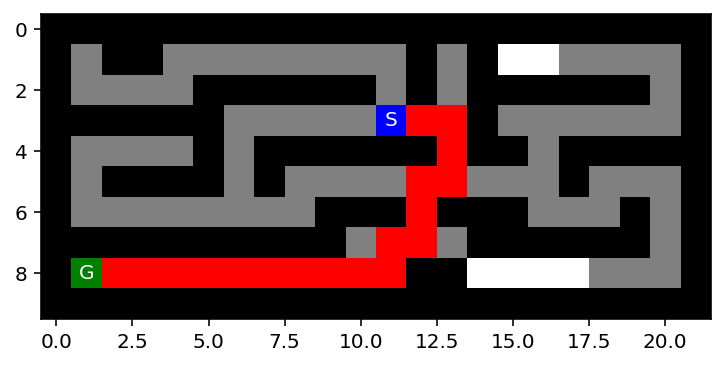

DFS:
Path Cost: 19
Nodes Expanded: 82
Max Tree Depth: 23
Max Tree Size: 23
Max Frontier Size: 6


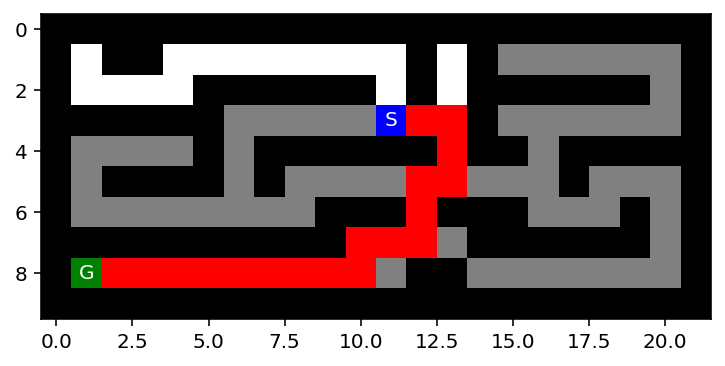

GBS:
Path Cost: 29
Nodes Expanded: 45
Max Tree Depth: 30
Max Tree Size: 46
Max Frontier Size: 6


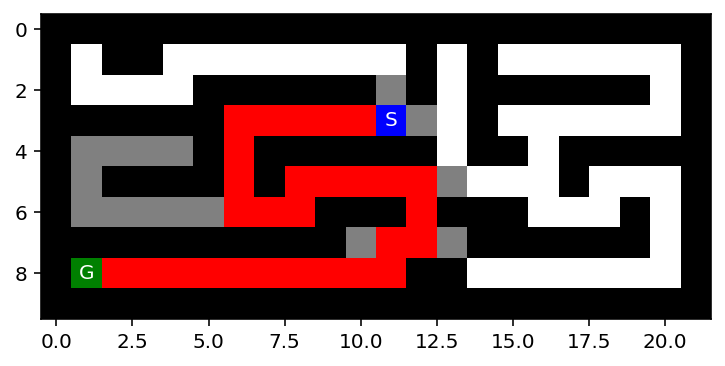

A*:
Path Cost: 19
Nodes Expanded: 59
Max Tree Depth: 19
Max Tree Size: 60
Max Frontier Size: 9


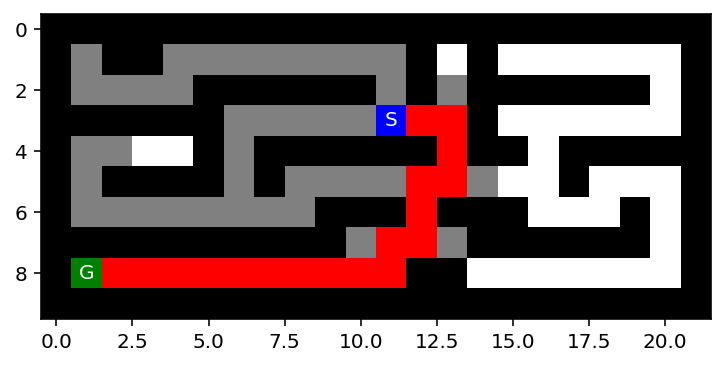

In [10]:
run_maze("small_maze.txt")

__Small maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    19     |       87       |       20       |        87     |          9        |
| DFS       |    19     |       82       |       23       |        23     |          6        |
| GBS       |    29     |       45       |       30       |        46     |          6        |
| A*        |    19     |       59       |       19       |        60     |          9        |

BFS:
Path Cost: 68
Nodes Expanded: 269
Max Tree Depth: 69
Max Tree Size: 269
Max Frontier Size: 8


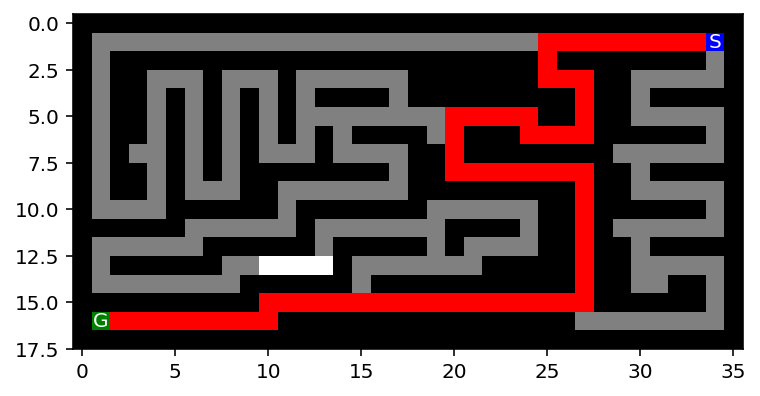

DFS:
Path Cost: 130
Nodes Expanded: 155
Max Tree Depth: 131
Max Tree Size: 131
Max Frontier Size: 9


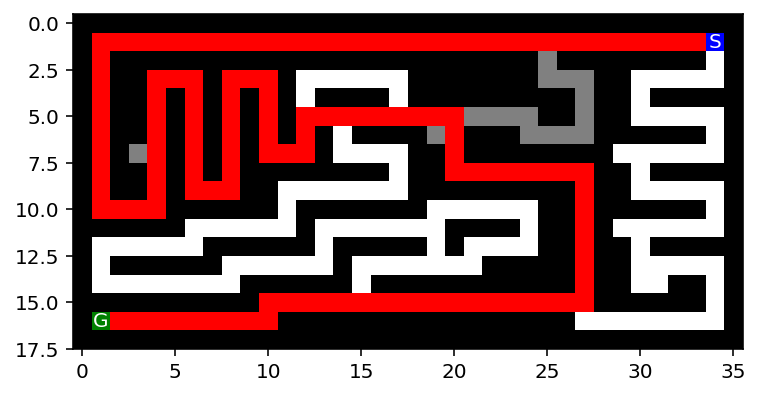

GBS:
Path Cost: 74
Nodes Expanded: 82
Max Tree Depth: 75
Max Tree Size: 83
Max Frontier Size: 4


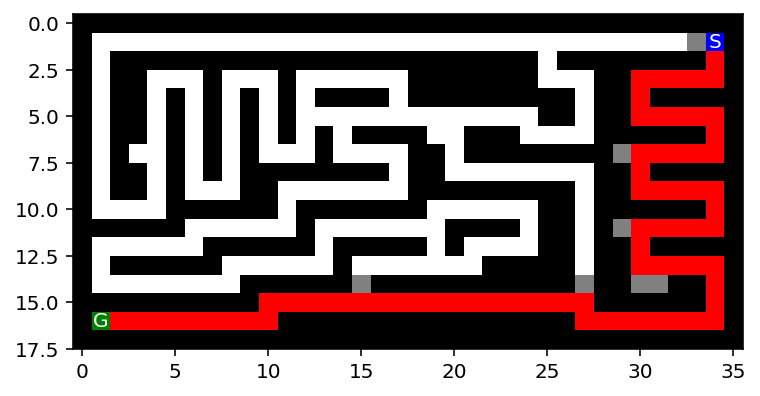

A*:
Path Cost: 68
Nodes Expanded: 227
Max Tree Depth: 68
Max Tree Size: 228
Max Frontier Size: 8


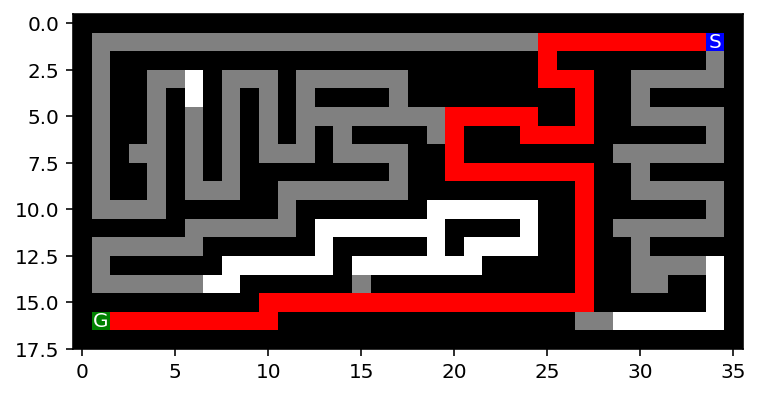

In [11]:
run_maze("medium_maze.txt")

__Medium Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     68      |     269           |       69        |      269         |        8         |
| DFS       |     130     |     155           |       131       |      131         |        9         |
| GBS       |     74      |     82            |       75        |       83         |        4         |
| A*        |     68      |     227           |       68        |      228         |        8         |

BFS:
Path Cost: 210
Nodes Expanded: 620
Max Tree Depth: 211
Max Tree Size: 620
Max Frontier Size: 8


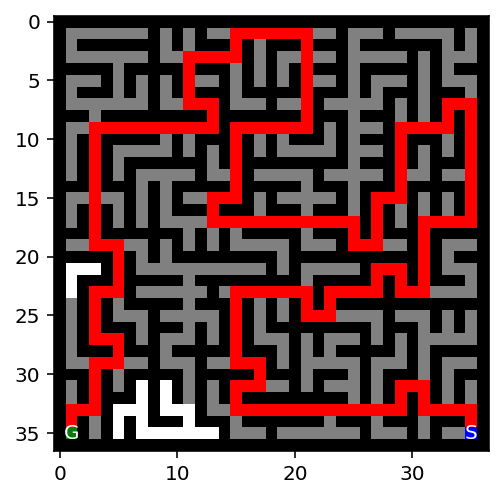

DFS:
Path Cost: 210
Nodes Expanded: 426
Max Tree Depth: 223
Max Tree Size: 223
Max Frontier Size: 39


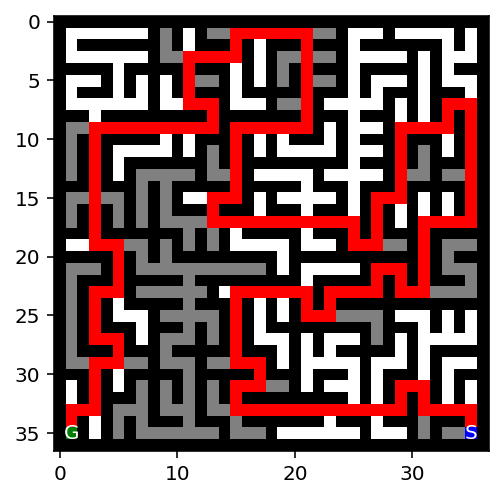

GBS:
Path Cost: 210
Nodes Expanded: 487
Max Tree Depth: 211
Max Tree Size: 488
Max Frontier Size: 21


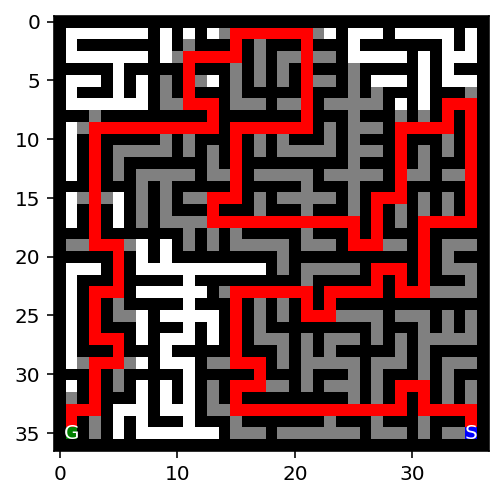

A*:
Path Cost: 210
Nodes Expanded: 556
Max Tree Depth: 210
Max Tree Size: 557
Max Frontier Size: 12


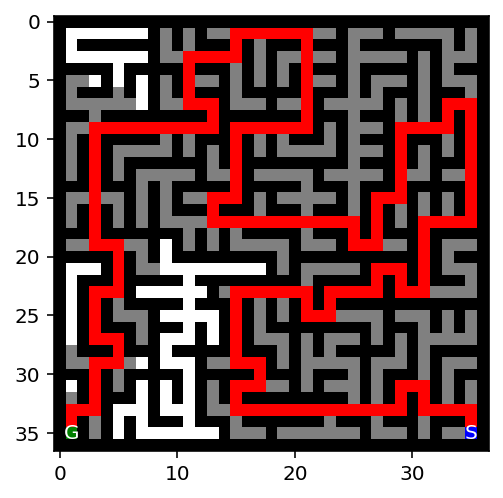

In [12]:
run_maze("large_maze.txt")

__Large Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    210       |      620          |       211         |     620          |         8          |
| DFS       |    210       |      426          |       223         |     223          |         39          |
| GBS       |    210       |      487          |       211         |     488          |         21          |
| A*        |    210       |      556          |       210         |     557          |         12          |

BFS:
Path Cost: 54
Nodes Expanded: 682
Max Tree Depth: 55
Max Tree Size: 682
Max Frontier Size: 25


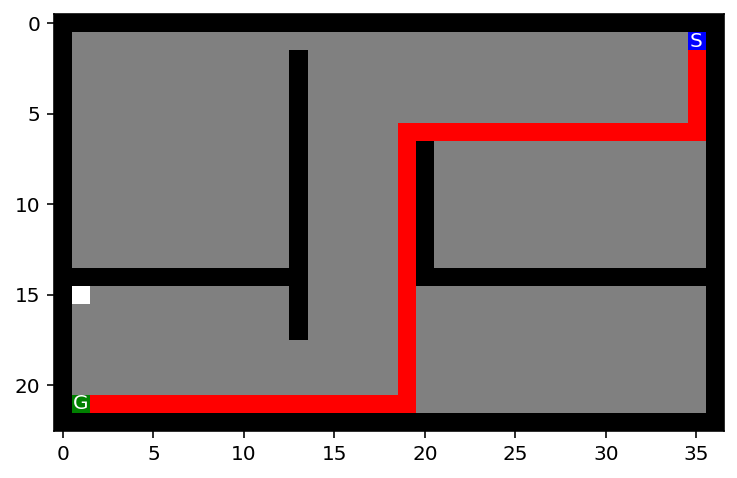

DFS:
Path Cost: 330
Nodes Expanded: 1167
Max Tree Depth: 331
Max Tree Size: 331
Max Frontier Size: 329


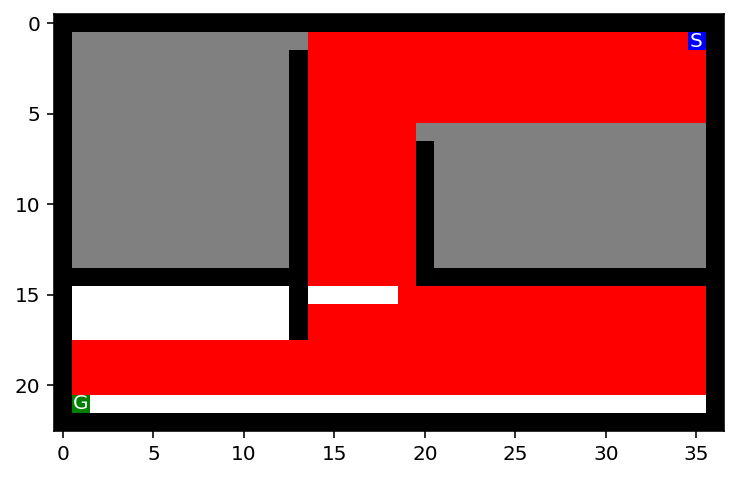

GBS:
Path Cost: 68
Nodes Expanded: 155
Max Tree Depth: 69
Max Tree Size: 156
Max Frontier Size: 66


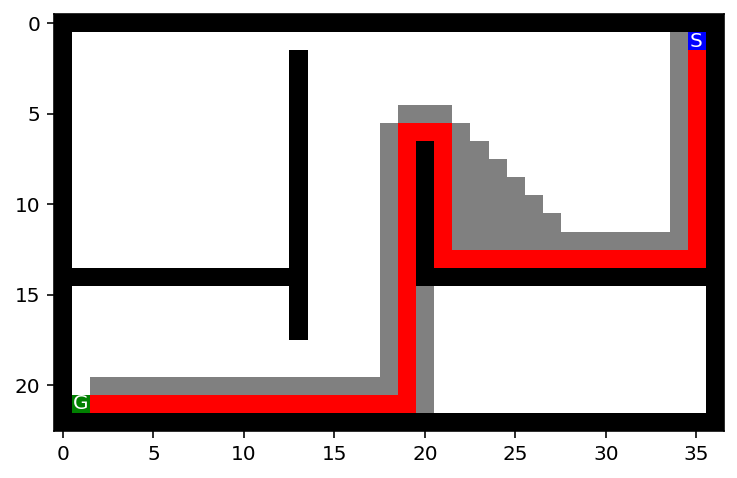

A*:
Path Cost: 54
Nodes Expanded: 554
Max Tree Depth: 54
Max Tree Size: 555
Max Frontier Size: 25


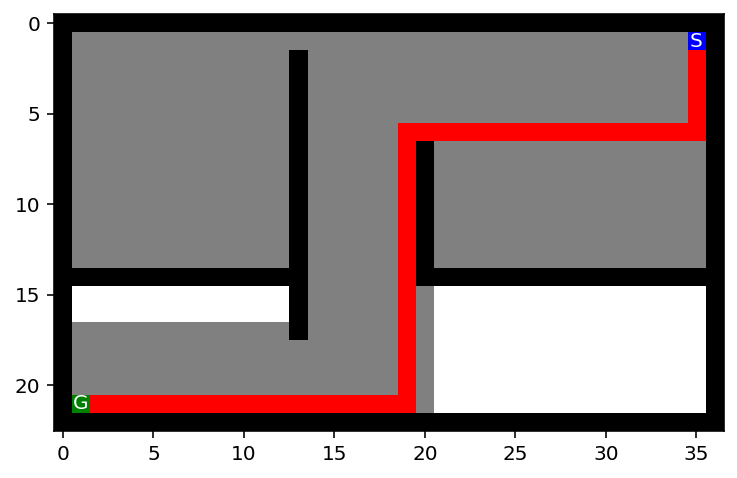

In [13]:
run_maze("open_maze.txt")

__Open Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     54      |      682          |       55         |      682         |        25           |
| DFS       |     330     |      1167         |       331        |      331         |        329          |
| GBS       |     68      |      155          |       69         |      156         |        66           |
| A*        |     54      |      554          |       54         |      555         |        25           |

BFS:
Path Cost: 23
Nodes Expanded: 71
Max Tree Depth: 24
Max Tree Size: 71
Max Frontier Size: 8


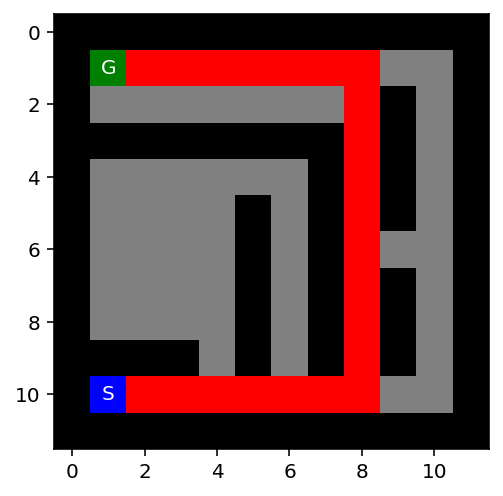

DFS:
Path Cost: 27
Nodes Expanded: 42
Max Tree Depth: 28
Max Tree Size: 28
Max Frontier Size: 12


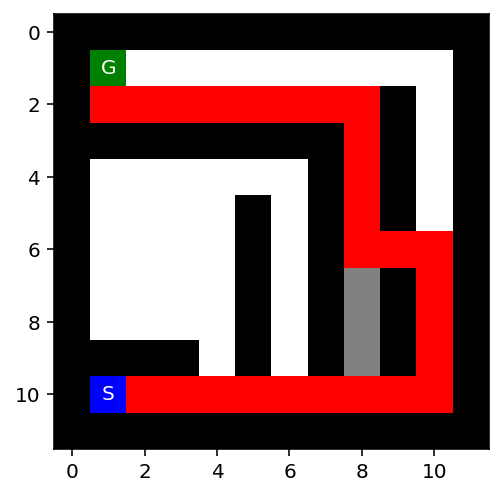

GBS:
Path Cost: 23
Nodes Expanded: 61
Max Tree Depth: 24
Max Tree Size: 62
Max Frontier Size: 10


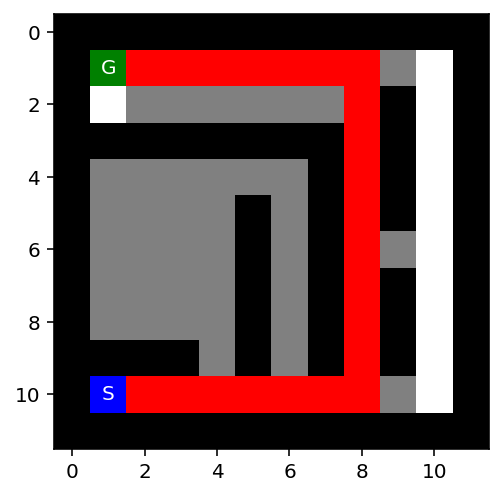

A*:
Path Cost: 23
Nodes Expanded: 61
Max Tree Depth: 23
Max Tree Size: 62
Max Frontier Size: 6


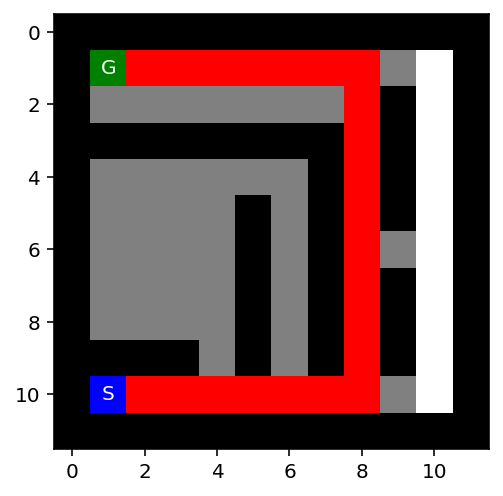

In [14]:
run_maze("loops_maze.txt")

__Loops Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |     23      |       71         |      24          |      71         |         8          |
| DFS       |     27      |       42         |      28          |      28         |         12         |
| GBS       |     23      |       61         |      24          |      62         |         10         |
| A*        |     23      |       61         |      23          |      62         |         6          |

BFS:
Path Cost: 14
Nodes Expanded: 88
Max Tree Depth: 15
Max Tree Size: 88
Max Frontier Size: 11


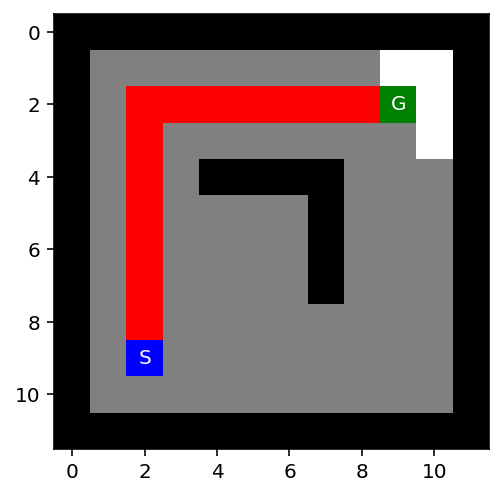

DFS:
Path Cost: 60
Nodes Expanded: 351
Max Tree Depth: 73
Max Tree Size: 73
Max Frontier Size: 60


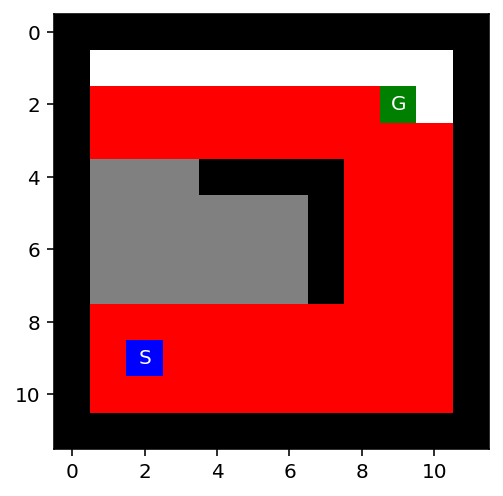

GBS:
Path Cost: 14
Nodes Expanded: 43
Max Tree Depth: 15
Max Tree Size: 44
Max Frontier Size: 29


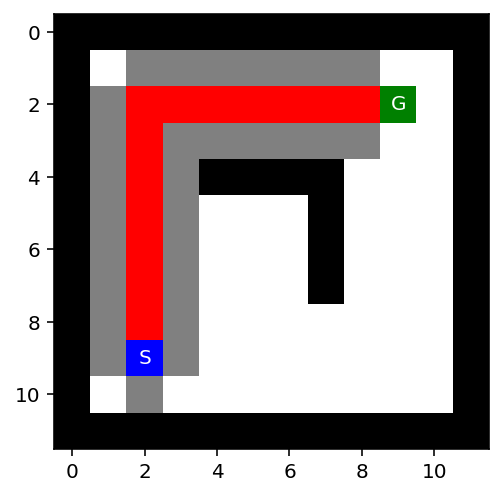

A*:
Path Cost: 14
Nodes Expanded: 85
Max Tree Depth: 15
Max Tree Size: 86
Max Frontier Size: 30


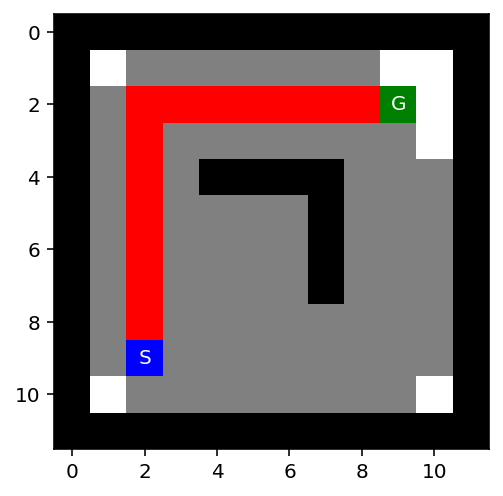

In [15]:
run_maze("wall_maze.txt")

__Wall Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    14       |       88         |         15       |       88        |         11          |
| DFS       |    60       |       351        |         73       |       73        |         60          |
| GBS       |    14       |       43         |         15       |       44        |         29          |
| A*        |    14       |       85         |         15       |       86        |         30          |

BFS:
Path Cost: 14
Nodes Expanded: 95
Max Tree Depth: 15
Max Tree Size: 95
Max Frontier Size: 12


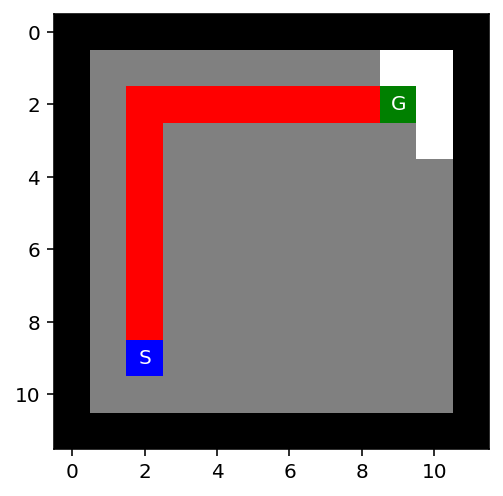

DFS:
Path Cost: 88
Nodes Expanded: 169
Max Tree Depth: 89
Max Tree Size: 89
Max Frontier Size: 81


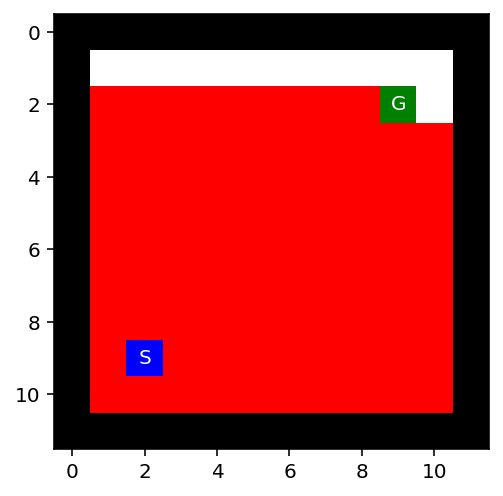

GBS:
Path Cost: 14
Nodes Expanded: 43
Max Tree Depth: 15
Max Tree Size: 44
Max Frontier Size: 29


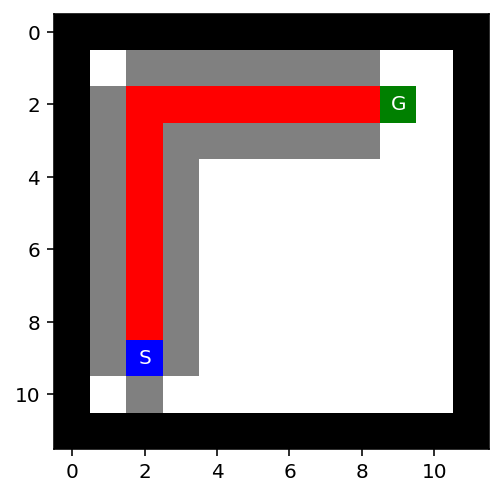

A*:
Path Cost: 14
Nodes Expanded: 92
Max Tree Depth: 15
Max Tree Size: 93
Max Frontier Size: 30


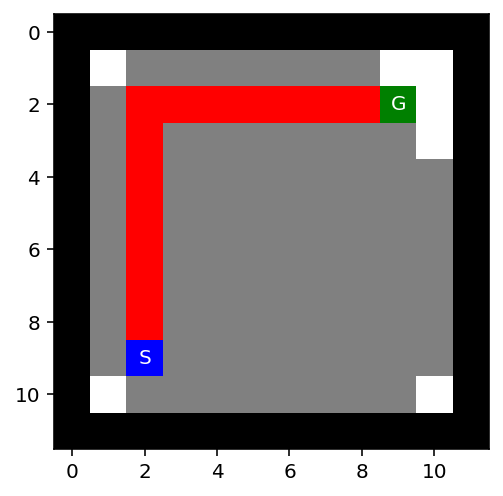

In [16]:
run_maze("empty_maze.txt")

__Empty Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    14       |       95         |        15        |      95         |        12           |
| DFS       |    88       |       169        |        89        |      89         |        81           |
| GBS       |    14       |       43         |        15        |      44         |        29           |
| A*        |    14       |       92         |        15        |      93         |        30           |

BFS:
Path Cost: 14
Nodes Expanded: 95
Max Tree Depth: 15
Max Tree Size: 95
Max Frontier Size: 12


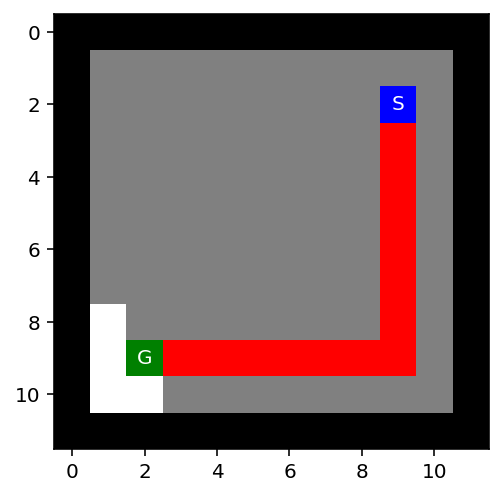

DFS:
Path Cost: 70
Nodes Expanded: 145
Max Tree Depth: 71
Max Tree Size: 71
Max Frontier Size: 75


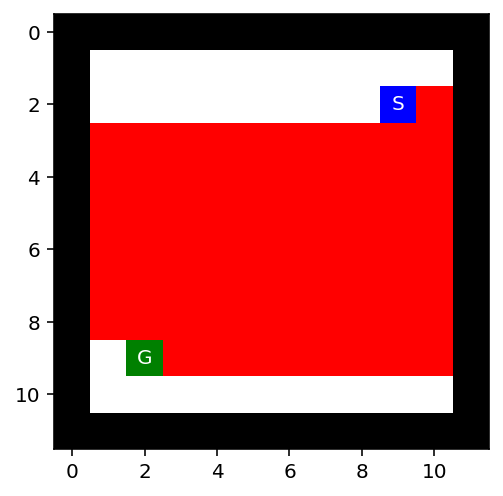

GBS:
Path Cost: 14
Nodes Expanded: 43
Max Tree Depth: 15
Max Tree Size: 44
Max Frontier Size: 29


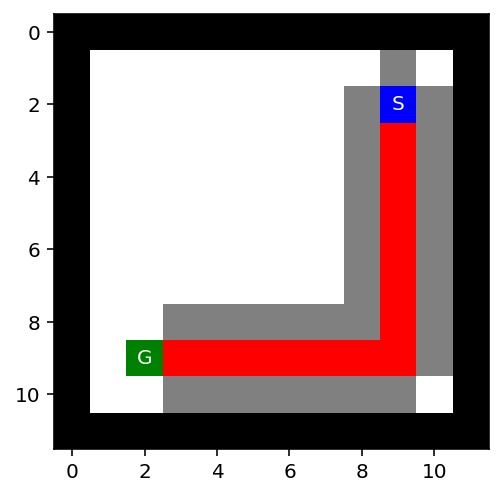

A*:
Path Cost: 14
Nodes Expanded: 92
Max Tree Depth: 15
Max Tree Size: 93
Max Frontier Size: 30


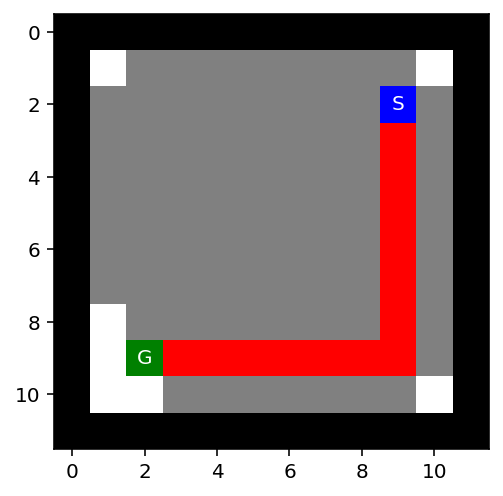

In [17]:
run_maze("empty_2_maze.txt")

__Empty2 Maze__

| algorithm | path cost | nodes expanded | max tree depth | max tree size | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |    14       |       95         |       15         |      95         |        12           |
| DFS       |    70       |       145        |       71         |      71         |        75           |
| GBS       |    14       |       43         |       15         |      44         |        29           |
| A*        |    14       |       92         |       15         |      93         |        30           |

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import MultipleLocator

import xlrd
from xlrd import open_workbook

def draw_path_cost():                             
    figure(num=None, figsize=(5, 2), dpi=300)
    
    BFS = [19, 68, 210, 54, 23, 14, 14, 14]
    DFS = [19, 130, 210, 330, 27, 60, 88, 70]
    GBS = [29, 74, 210, 68, 23, 14, 14, 14]
    AStar = [19, 68, 210, 54, 23, 14, 14, 14]
    plt.plot(BFS, 'blue', label='BFS')
    plt.plot(DFS, 'green', label='DFS')
    plt.plot(GBS, 'red', label='GBS')
    plt.plot(AStar, 'yellow', label='A*')

    plt.xticks(range(0, 8), ['Small','Medium','Large','Open','Loops','Wall','Empty','Empty2'], fontsize=4)
    plt.yticks(fontsize=4)
    plt.legend(loc='lower right', prop={'size':4})
    plt.title('Path Cost', fontdict={'size':4})
    plt.xlabel('maze', fontdict={'size':4})
    plt.ylabel('steps', fontdict={'size':4})

    plt.savefig('./path_cost.png',dpi=300, bbox_inches="tight")
    plt.show()
    
def draw_nodes_expanded():                             
    figure(num=None, figsize=(5, 2), dpi=300)
    
    BFS = [87, 269, 620, 682, 71, 88, 95, 95]
    DFS = [82, 155, 426, 1167, 42, 357, 169, 145]
    GBS = [45, 82, 487, 155, 61, 43, 43, 43]
    AStar = [49, 227, 556, 554, 61, 85, 92, 92]
    plt.plot(BFS, 'blue', label='BFS')
    plt.plot(DFS, 'green', label='DFS')
    plt.plot(GBS, 'red', label='GBS')
    plt.plot(AStar, 'yellow', label='A*')

    plt.xticks(range(0, 8), ['Small','Medium','Large','Open','Loops','Wall','Empty','Empty2'], fontsize=4)
    plt.yticks(fontsize=4)
    plt.legend(loc='lower right', prop={'size':4})
    plt.title('Nodes Expanded', fontdict={'size':4})
    plt.xlabel('maze', fontdict={'size':4})
    plt.ylabel('number of nodes', fontdict={'size':4})

    plt.savefig('./nodes_expanded.png',dpi=300, bbox_inches="tight")
    plt.show()
    
def draw_max_tree_depth():                             
    figure(num=None, figsize=(5, 2), dpi=300)
    
    BFS = [20, 69, 211, 55, 24, 15, 15, 15]
    DFS = [23, 131, 223, 331, 28, 73, 89, 75]
    GBS = [30, 75, 211, 69, 24, 15, 15, 15]
    AStar = [19, 68, 210, 54, 23, 15, 15, 15]
    plt.plot(BFS, 'blue', label='BFS')
    plt.plot(DFS, 'green', label='DFS')
    plt.plot(GBS, 'red', label='GBS')
    plt.plot(AStar, 'yellow', label='A*')

    plt.xticks(range(0, 8), ['Small','Medium','Large','Open','Loops','Wall','Empty','Empty2'], fontsize=4)
    plt.yticks(fontsize=4)
    plt.legend(loc='lower right', prop={'size':4})
    plt.title('Max Tree Depth', fontdict={'size':4})
    plt.xlabel('maze', fontdict={'size':4})
    plt.ylabel('depth', fontdict={'size':4})

    plt.savefig('./max_tree_depth.png',dpi=300, bbox_inches="tight")
    plt.show()
    
def draw_max_tree_size():                             
    figure(num=None, figsize=(5, 2), dpi=300)
    
    BFS = [87, 269, 620, 682, 71, 88, 95, 95]
    DFS = [23, 131, 223, 331, 28, 73, 89, 71]
    GBS = [46, 83, 488, 156, 62, 44, 44, 44]
    AStar = [160, 228, 557, 555, 62, 86, 93, 93]
    plt.plot(BFS, 'blue', label='BFS')
    plt.plot(DFS, 'green', label='DFS')
    plt.plot(GBS, 'red', label='GBS')
    plt.plot(AStar, 'yellow', label='A*')

    plt.xticks(range(0, 8), ['Small','Medium','Large','Open','Loops','Wall','Empty','Empty2'], fontsize=4)
    plt.yticks(fontsize=4)
    plt.legend(loc='lower right', prop={'size':4})
    plt.title('Max Tree Size', fontdict={'size':4})
    plt.xlabel('maze', fontdict={'size':4})
    plt.ylabel('size', fontdict={'size':4})

    plt.savefig('./max_tree_size.png',dpi=300, bbox_inches="tight")
    plt.show()

def draw_max_frontier_size():                             
    figure(num=None, figsize=(5, 2), dpi=300)
    
    BFS = [9, 8, 8, 25, 8, 11, 12, 12]
    DFS = [6, 9, 39, 329, 12, 60, 81, 75]
    GBS = [6, 4, 21, 66, 10, 29, 29, 29]
    AStar = [9, 8, 12, 25, 6, 30, 30, 30]
    plt.plot(BFS, 'blue', label='BFS')
    plt.plot(DFS, 'green', label='DFS')
    plt.plot(GBS, 'red', label='GBS')
    plt.plot(AStar, 'yellow', label='A*')

    plt.xticks(range(0, 8), ['Small','Medium','Large','Open','Loops','Wall','Empty','Empty2'], fontsize=4)
    plt.yticks(fontsize=4)
    plt.legend(loc='lower right', prop={'size':4})
    plt.title('Max Frontier Size', fontdict={'size':4})
    plt.xlabel('maze', fontdict={'size':4})
    plt.ylabel('size', fontdict={'size':4})

    plt.savefig('./max_frontier_size.png',dpi=300, bbox_inches="tight")
    plt.show()

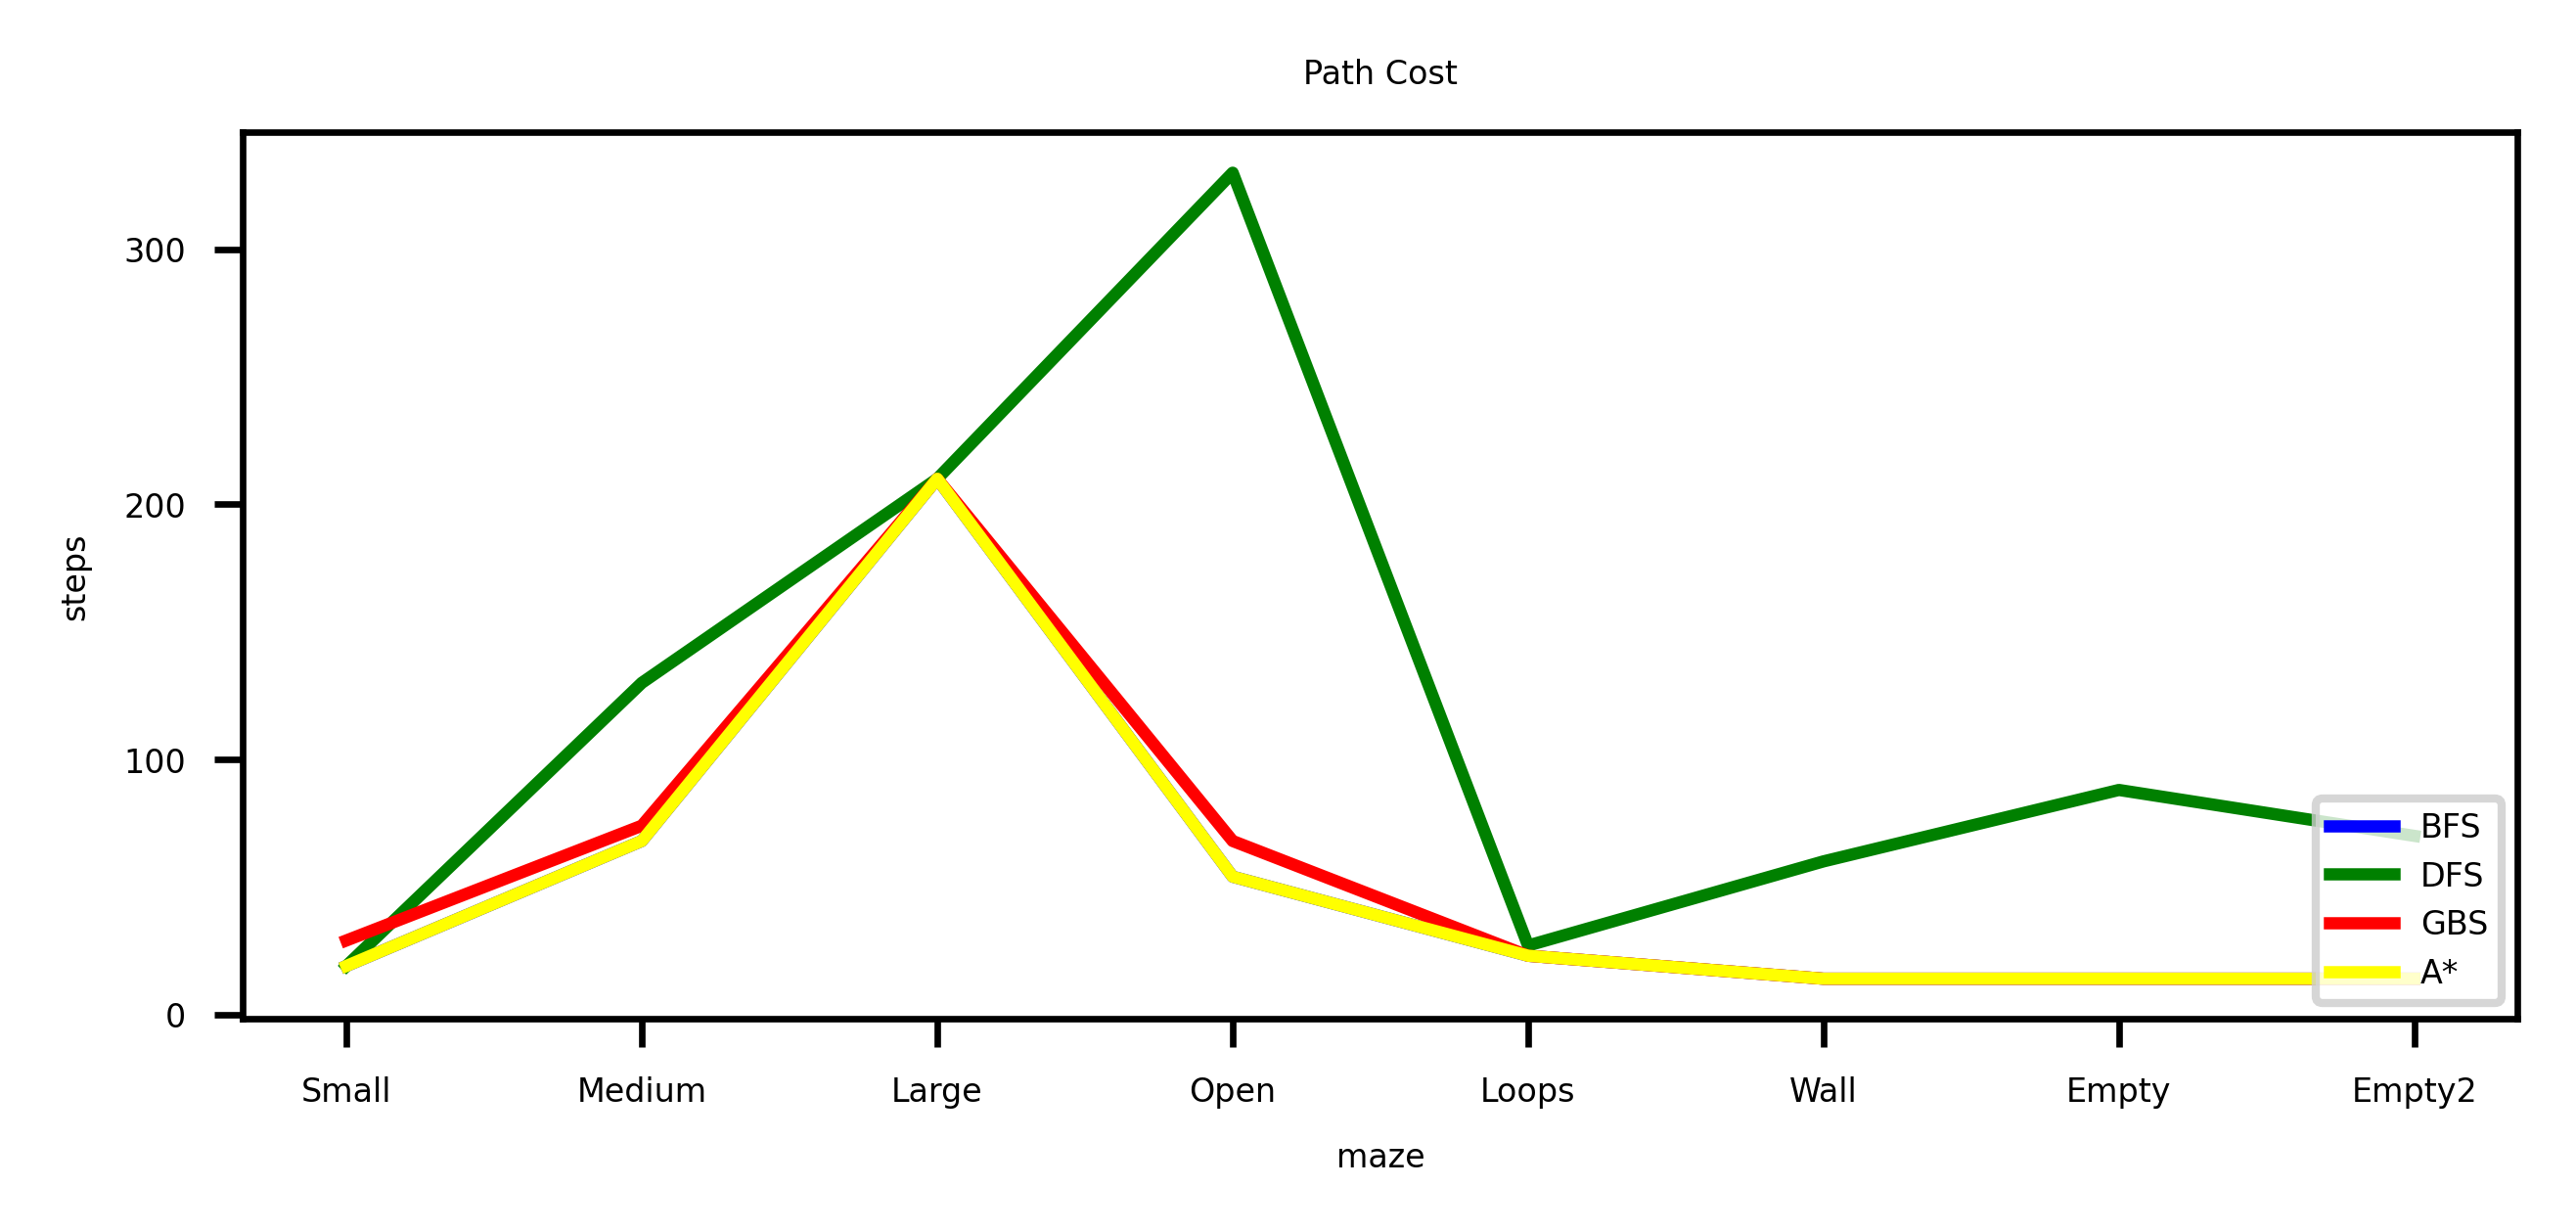

In [19]:
draw_path_cost()

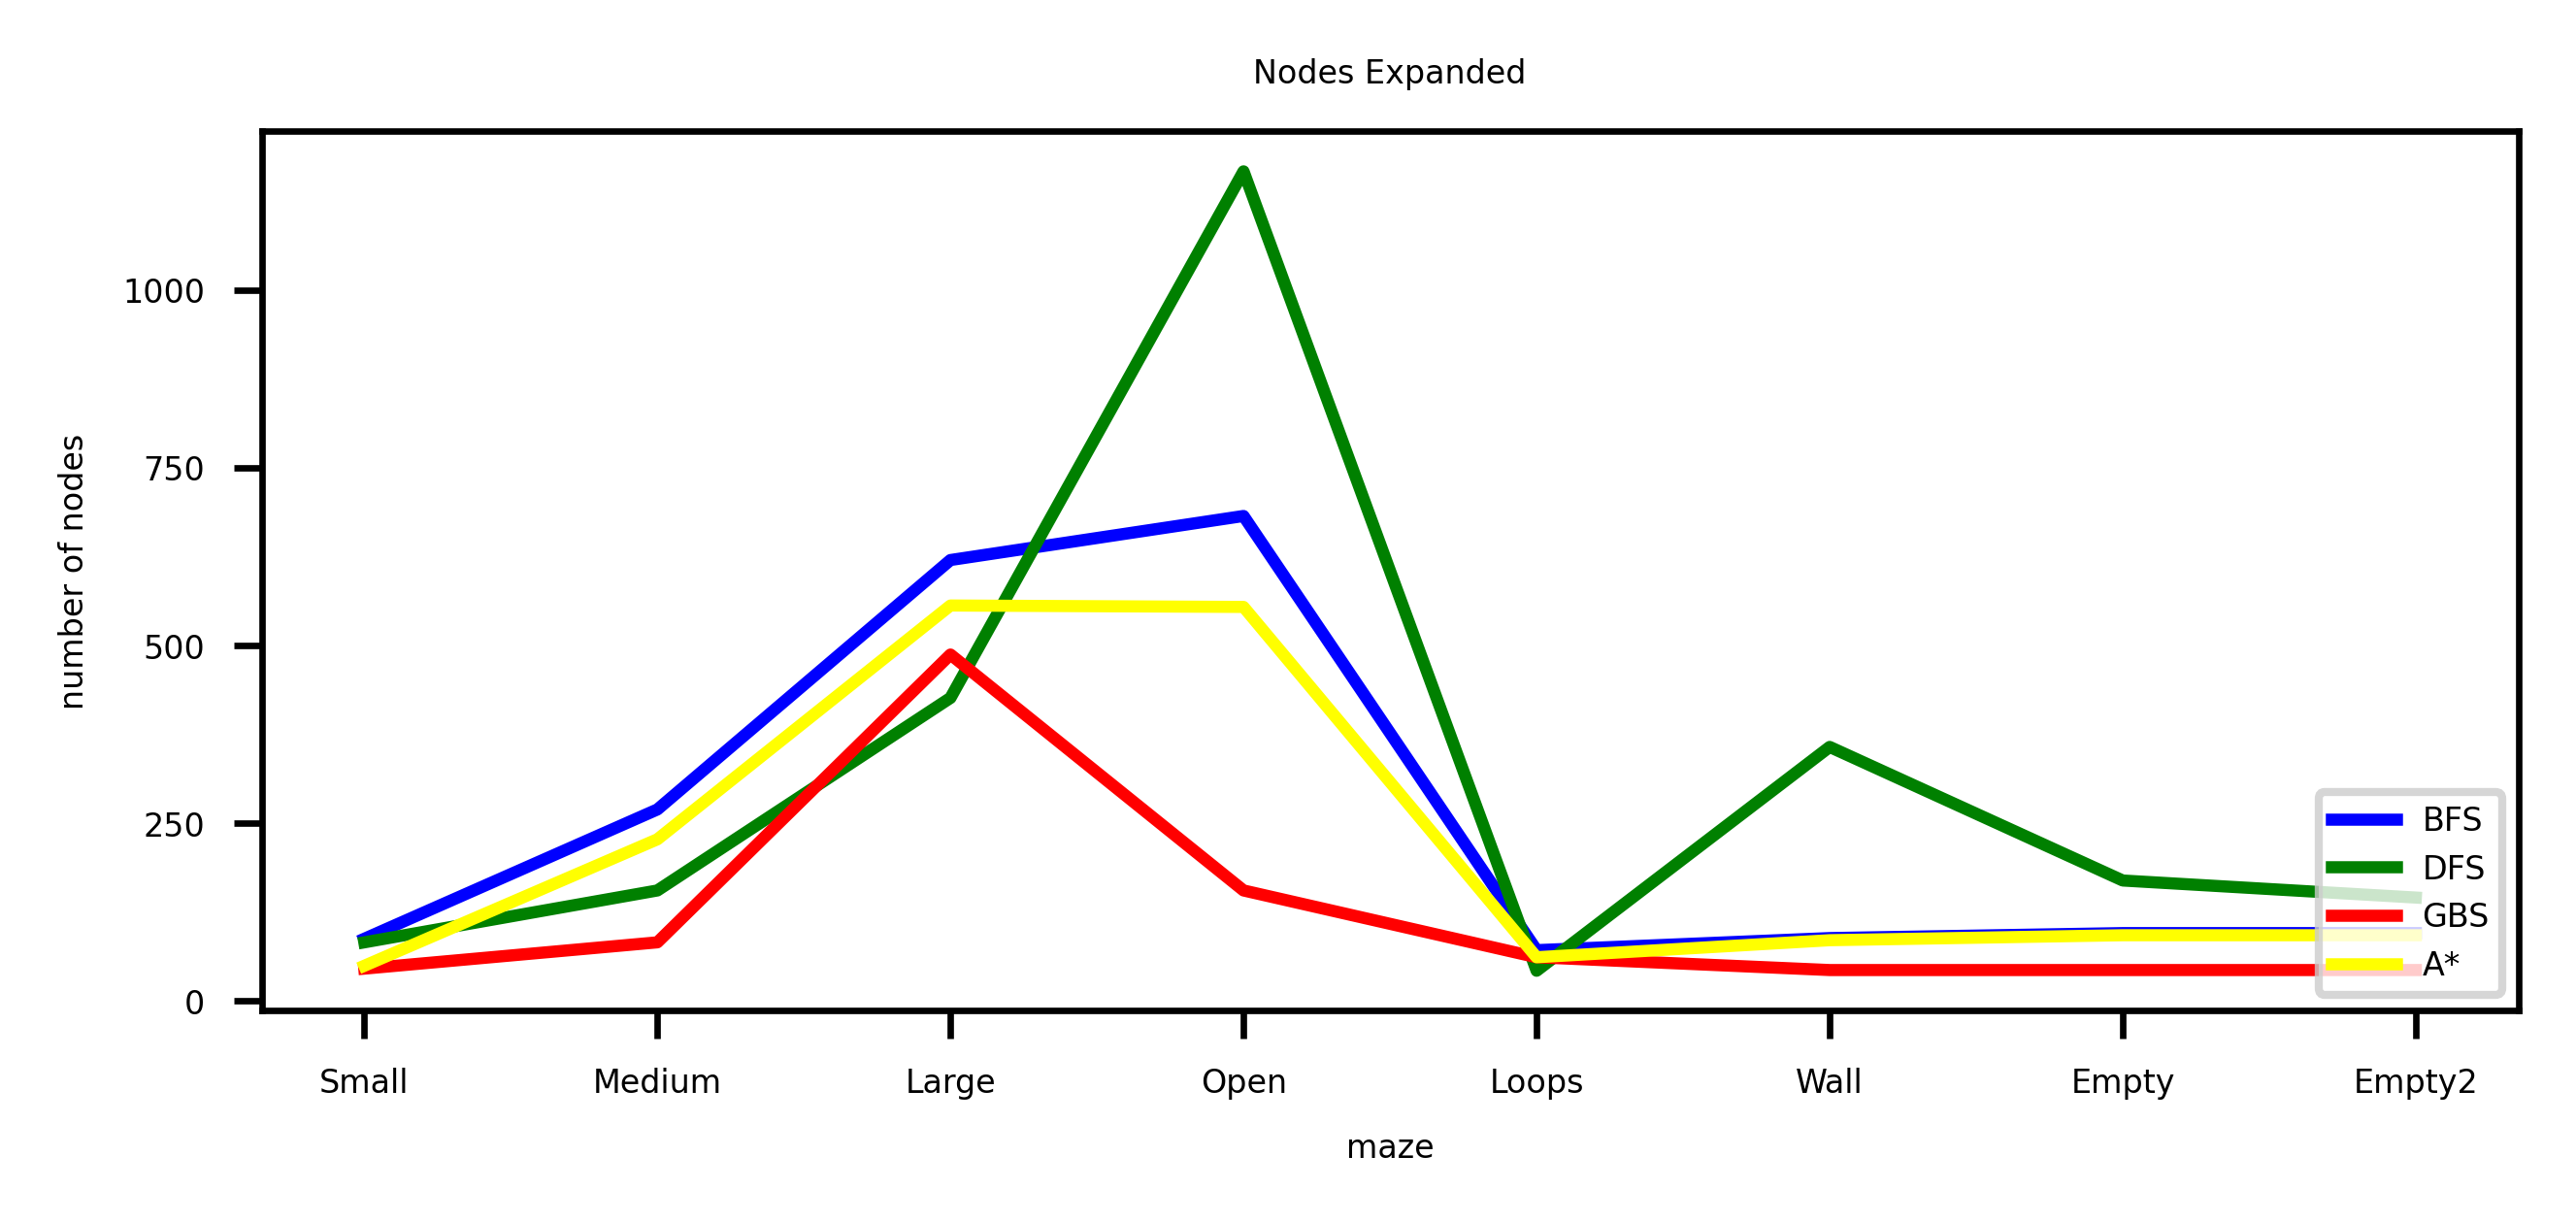

In [20]:
draw_nodes_expanded()

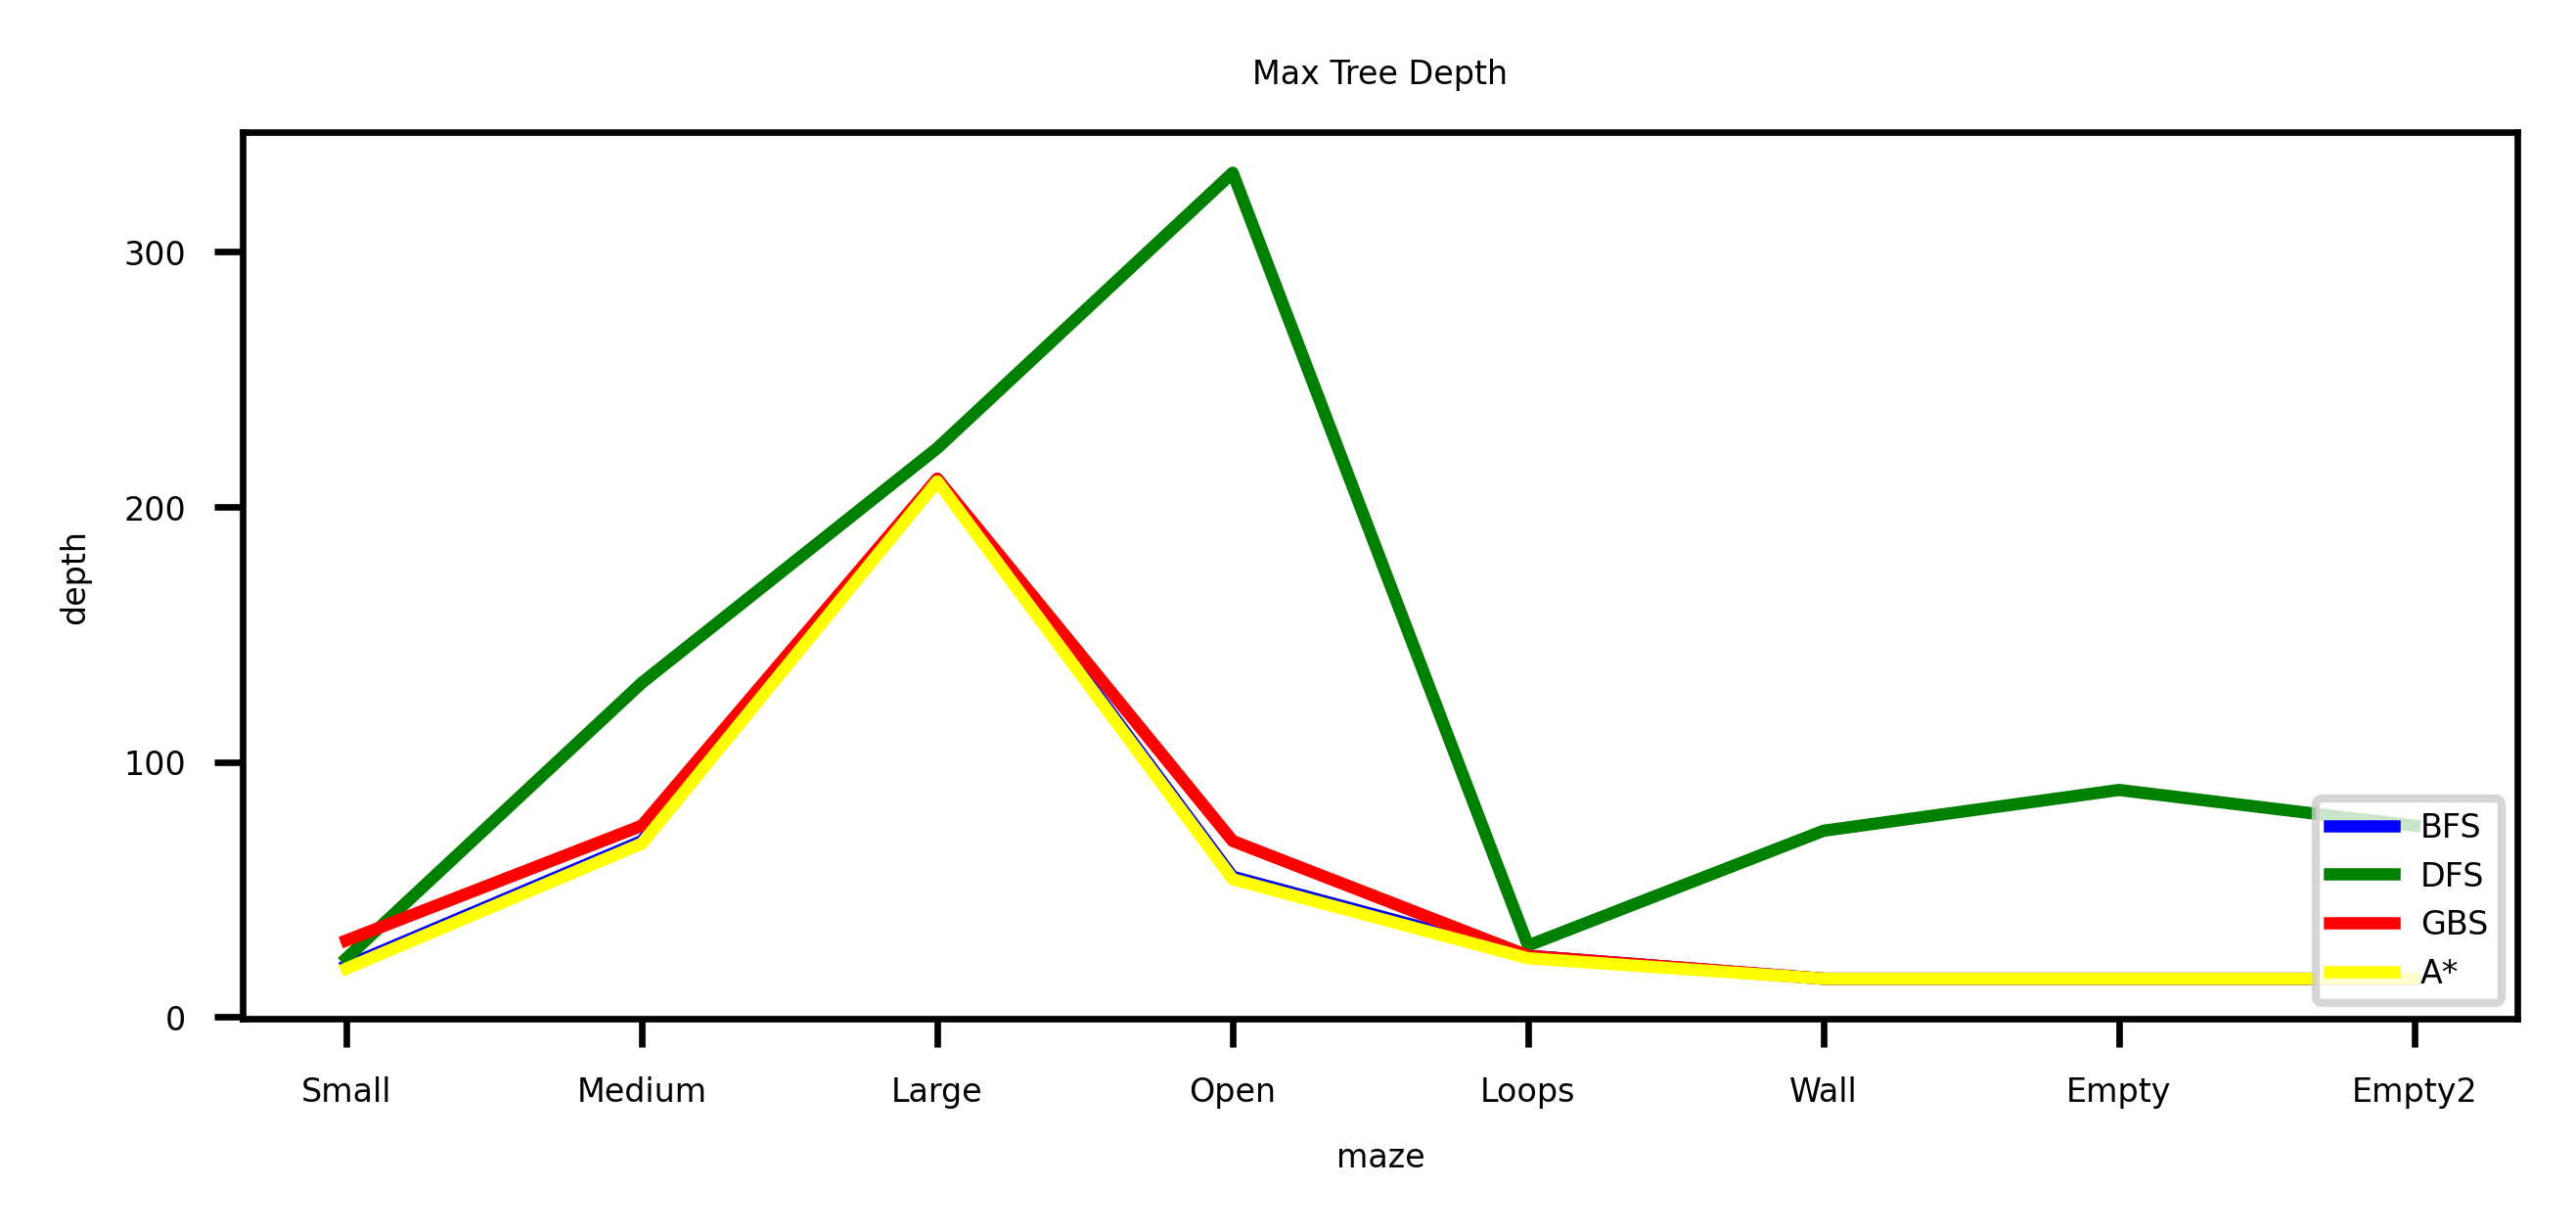

In [21]:
draw_max_tree_depth()

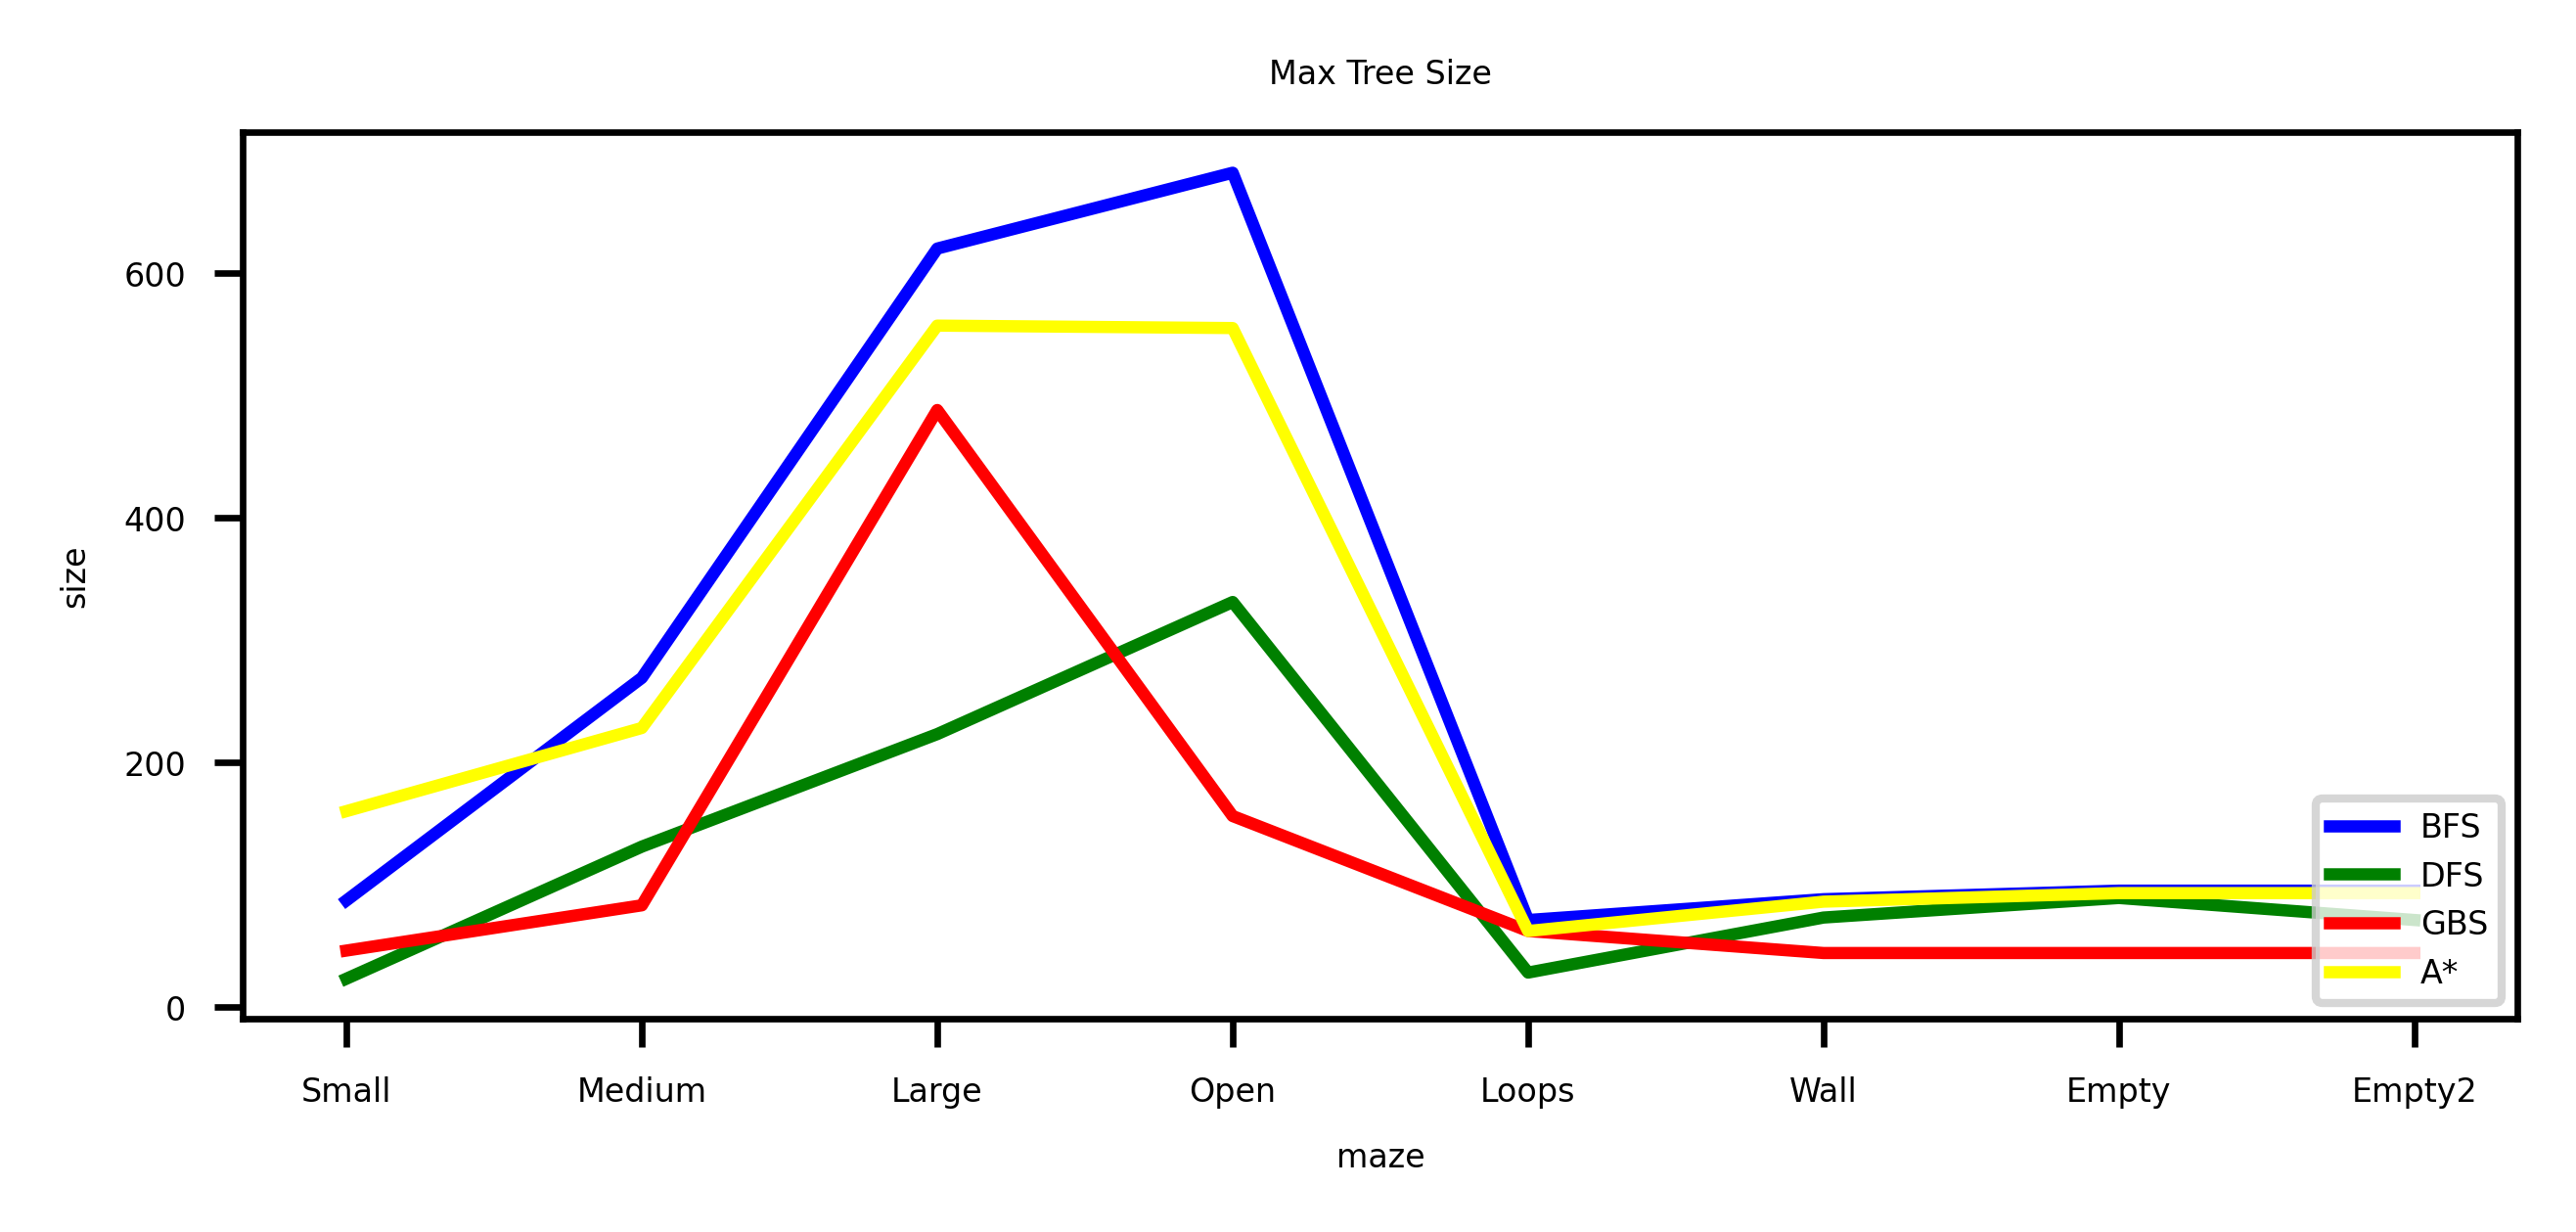

In [22]:
draw_max_tree_size()

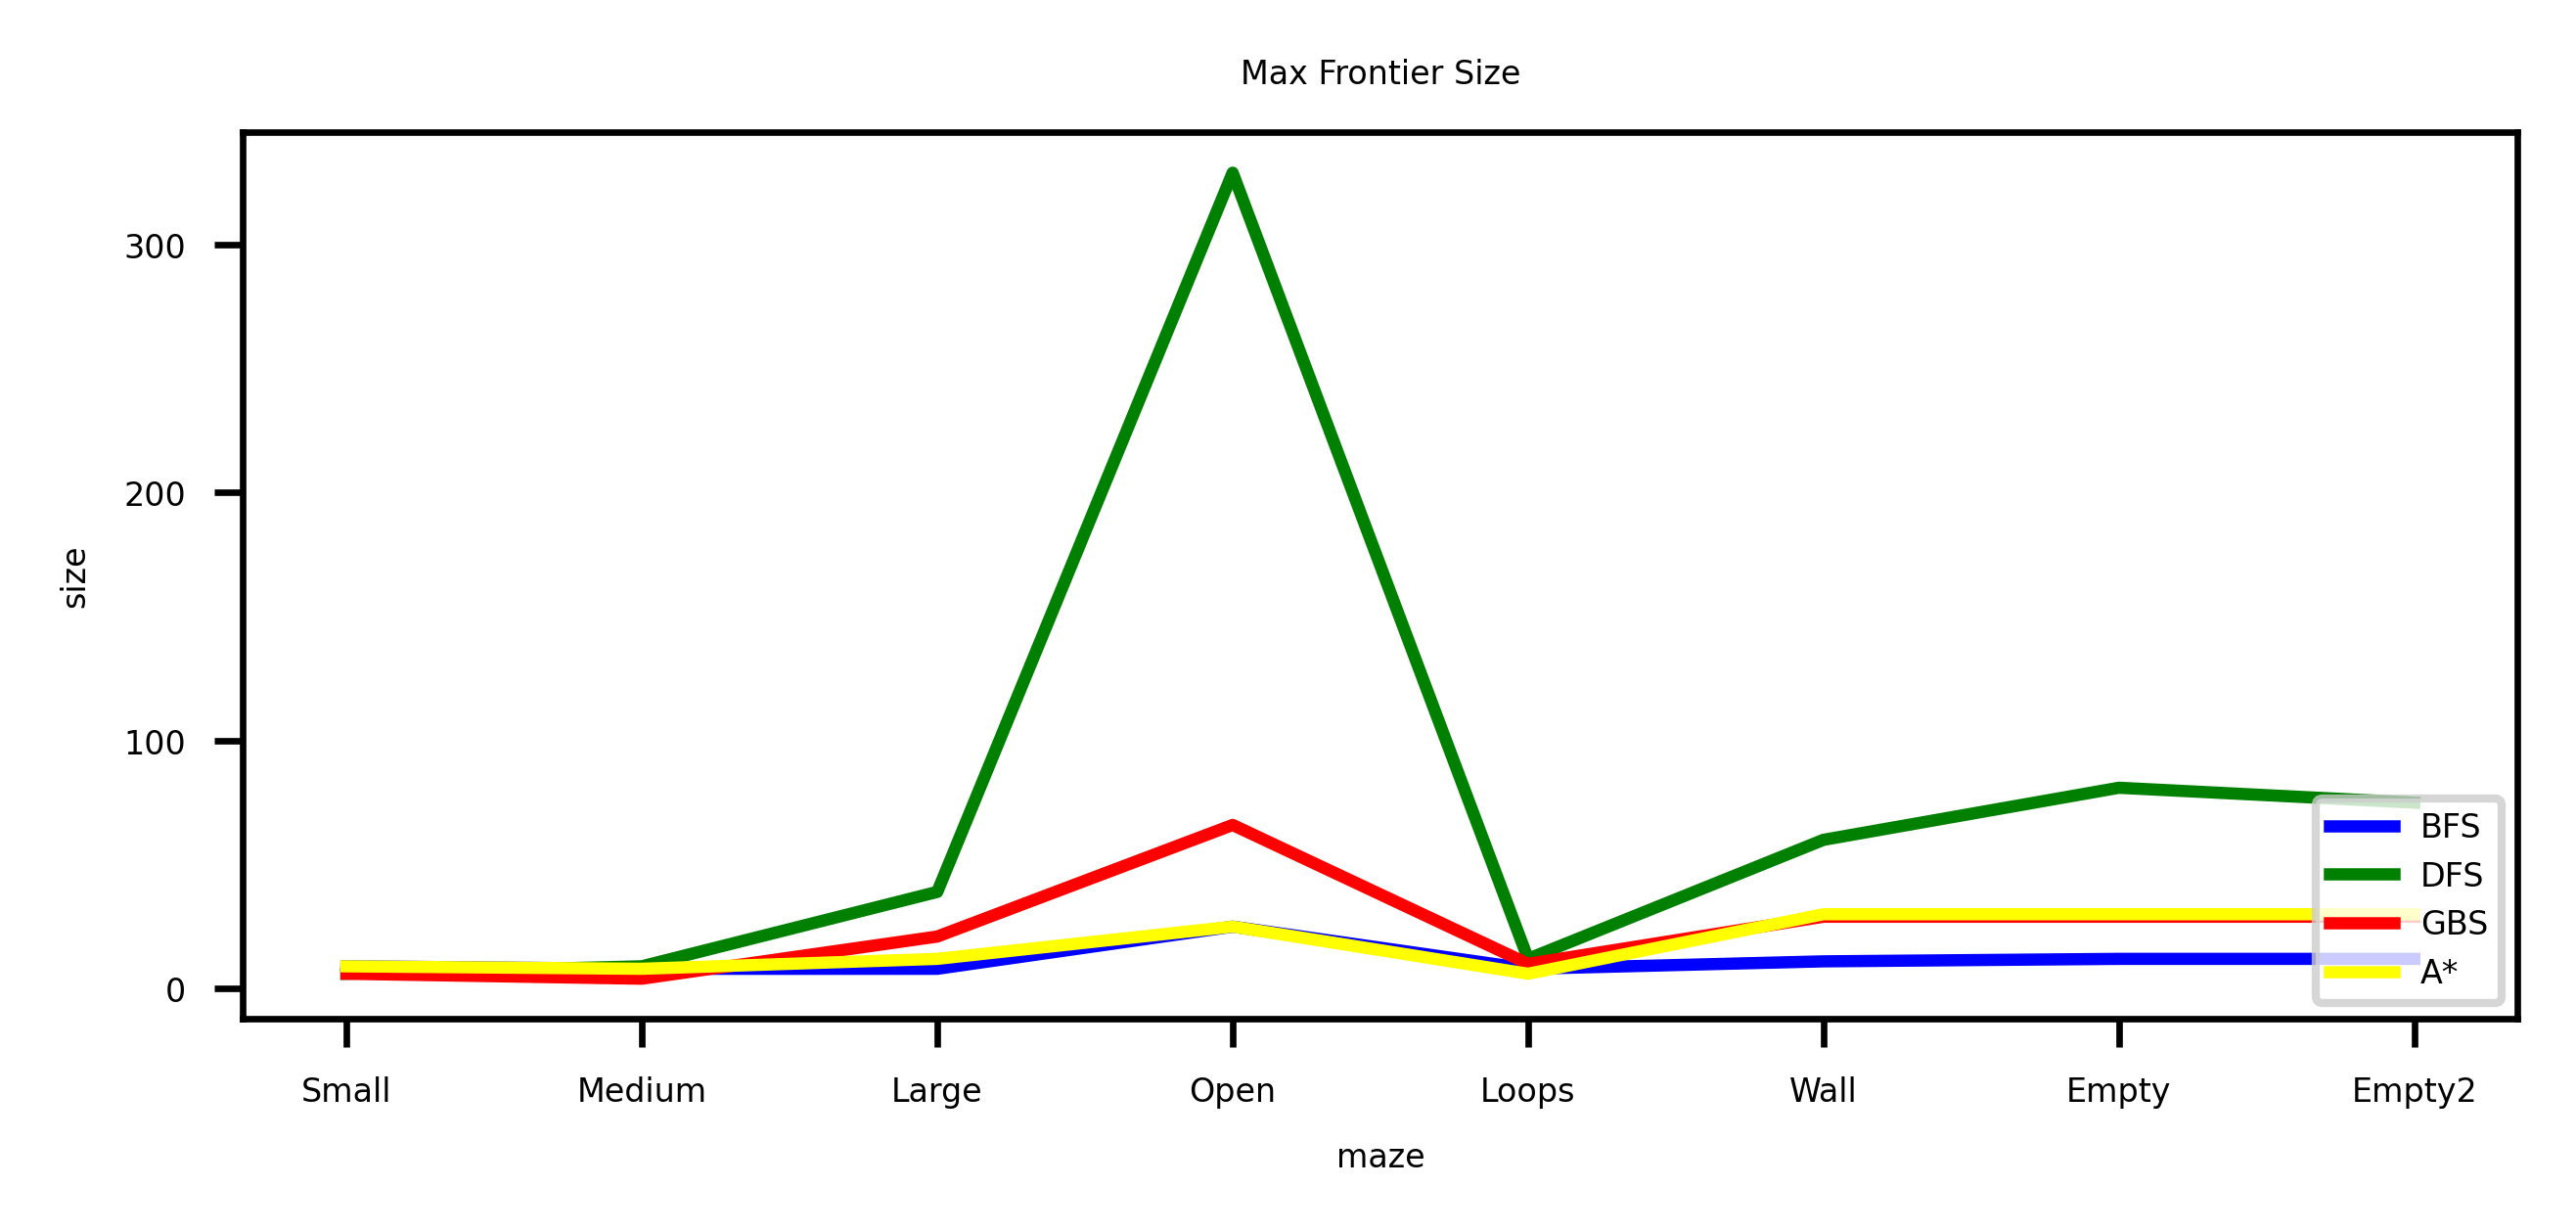

In [23]:
draw_max_frontier_size()

Discuss the most important lessons you have learned from implementing the different search strategies. 

__Answer:__
* Since DFS is not optimal and always return the first path it can find, the cost of DFS is always larger than other three implementations. However, since in my implementation DFS only store current path, it always uses much less space than other three implementations.
* A* and BFS can always find the shortest path to the goal. However without a proper strategy to expand nodes, it always expand more nodes than A*.
* A* can always find the optimal solution while GBS not, but also expands more node than GBS does.

## Graduate student advanced task: Multiple Goals [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement IDS (iterative deepening search using DFS). Run experiments to show which implementations find the optimal solution.

In [24]:
def ids(maze):
    depth = 1
    while(depth):
        result = dls(maze, depth)
        depth += 1
        if result != 0: 
            return result
    
def dls(maze, limit):
    # Find the start point and goal point
    start_node = Node(pos = find_pos(maze, what = "S"), parent = None, action = None, cost = 0)
    goal_node = Node(pos = find_pos(maze, what = "G"), parent = None, action = None, cost = 0)

    # If start point is goal point, finish
    current_node = start_node
    path = current_node.get_path_from_root()
    if current_node.pos == goal_node.pos: 
        return current_node

    frontier_nodes = queue.LifoQueue()
    frontier_nodes.put(current_node)

    # Attributes used to record performance
    count_node_expanded = 1
    max_tree_depth = 1
    max_tree_size = 1
    max_frontier_size = 1

    while frontier_nodes.empty() != True:

        # Cut off the branch if the cost of current path is greater than limit
        current_node = frontier_nodes.get()
        if current_node.cost > limit:
            continue
        if maze[current_node.pos[0]][current_node.pos[1]] != 'G' and \
           maze[current_node.pos[0]][current_node.pos[1]] != 'S': 
            maze[current_node.pos[0]][current_node.pos[1]] = '.'

        # If the node popped from frontier is on the current path
        # it will cause a cycle. So pop the next node in the queue.
        if current_node.pos in [n.pos for n in path] and current_node != start_node:
            continue
        else:
            path = current_node.get_path_from_root()

        if current_node.pos == goal_node.pos: 
            path = node.get_path_from_root()
            if len(path) > max_tree_depth: 
                max_tree_depth = len(path)
            if len(path) > max_tree_size: 
                max_tree_size = len(path)
            print("IDS:")
            print("Path Cost:", path[len(path) - 1].cost)
            print("Nodes Expanded:", count_node_expanded)
            print("Max Tree Depth:", max_tree_depth)
            print("Max Tree Size:", max_tree_size)
            print("Max Frontier Size:", max_frontier_size)
            for n in node.get_path_from_root():
                if maze[n.pos[0]][n.pos[1]] != 'G' and maze[n.pos[0]][n.pos[1]] != 'S': 
                    maze[n.pos[0]][n.pos[1]] = 'P'
            show_maze(maze)
            return node

        expand_list = expand(maze, current_node)
        for node in expand_list:
            if node.pos not in [n.pos for n in path]:
                frontier_nodes.put(node)

                count_node_expanded += 1
                if len(node.get_path_from_root()) > max_tree_depth: 
                    max_tree_depth = len(node.get_path_from_root())
                if len(node.get_path_from_root()) > max_tree_size: 
                    max_tree_size = len(node.get_path_from_root())
                if frontier_nodes.qsize() > max_frontier_size: 
                    max_frontier_size = frontier_nodes.qsize()

    return 0

BFS:
Path Cost: 29
Nodes Expanded: 85
Max Tree Depth: 30
Max Tree Size: 85
Max Frontier Size: 5


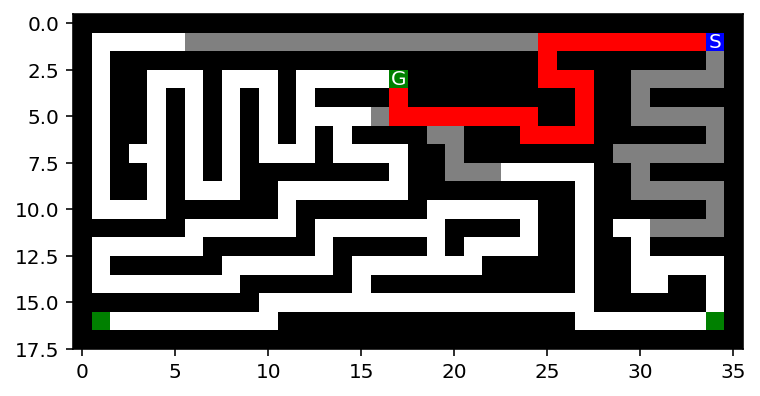

DFS:
Path Cost: 85
Nodes Expanded: 525
Max Tree Depth: 184
Max Tree Size: 184
Max Frontier Size: 10


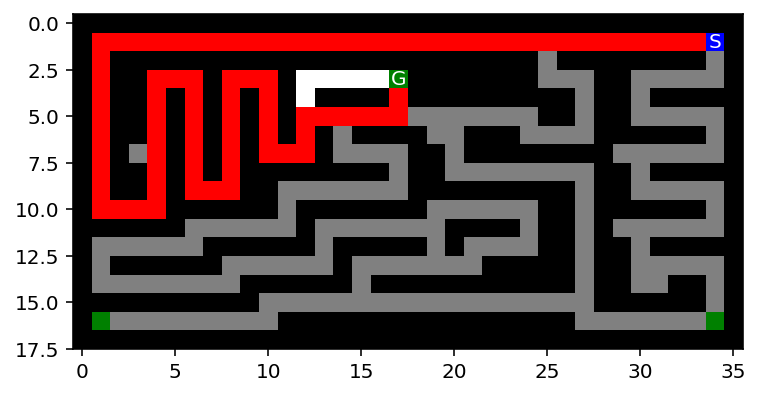

IDS:
Path Cost: 29
Nodes Expanded: 57
Max Tree Depth: 31
Max Tree Size: 31
Max Frontier Size: 5


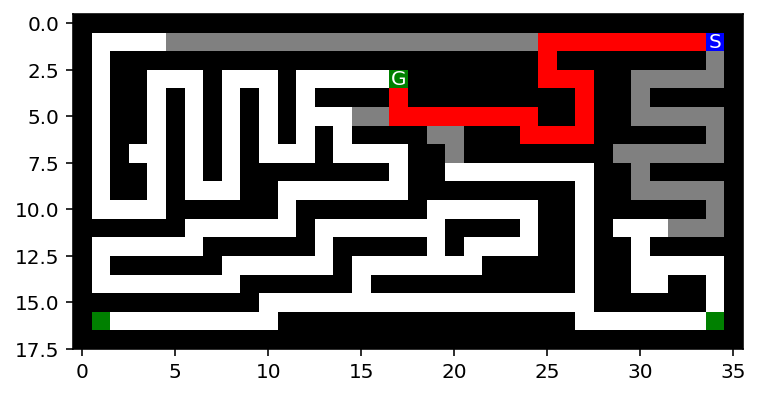

In [25]:
def run_mutiple_goals_maze():
    f = open("medium_maze_mutiple_goals.txt", "r")
    maze_str = f.read()
    maze = parse_maze(maze_str)

    bfs(maze)
    
    maze = parse_maze(maze_str)
    dfs(maze)
    
    maze = parse_maze(maze_str)
    ids(maze)
    
run_mutiple_goals_maze()

__Answer:__
We can see from the results that both BFS and IDS can find the shortesr path to the goal(optimal solution), while IDS expands less nodes and has smaller max tree size. Therefore, IDS can find optimal solution with less space cost. 

## More advanced tasks to think about

Instead of defining each square as a state (which you probably did), use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length in number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

__Answer:__
We can compare the different paths between two intersections, and use the smallest path length as the path cost between the two interactions.

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

__Answer:__
Making an asumption: the smaller the weights are, the more acuracy A* search will perform.

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

__Answer:__
We can use bumpers to give agent the perspective of the environment. I will implment an agent which can remember all the paths that it has explored, and and after it has explored the whole maze, it can choose the shortest path to get to the goal. If the agent get a GPS device, then it can initial a maze and continuously change the maze in its memory during exploring the maze.